# GTBIF Stock Price Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
pd.options.display.max_columns=1000
plt.style.use(style='seaborn')

In [3]:
df_gtbif = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/gtbif.csv')
df_gtbif['Date'] = pd.to_datetime(df_gtbif['Date'])
df_gtbif = df_gtbif.set_index('Date')
df_gtbif = df_gtbif.rename(columns={'Open':'gtbif_Open', 'High':'gtbif_High', 'Low':'gtbif_Low', 'Close':'gtbif_Close', 'Volume':'gtbif_Volume'})
df_gtbif = df_gtbif.drop('Adj Close', axis=1)
df_gtbif['gtbif_prev_close'] = df_gtbif['gtbif_Close'].shift(1)
df_gtbif['gtbif_next_close'] = df_gtbif['gtbif_Close'].shift(-1)
df_gtbif['gtbif_diff'] = df_gtbif['gtbif_Close'].diff()
df_gtbif['gtbif_%change'] = df_gtbif['gtbif_Close'].pct_change()
df_gtbif['gtbif_5day_avg_close'] = df_gtbif['gtbif_Close'].rolling(5).mean()
df_gtbif['gtbif_5day_avg_diff'] = df_gtbif['gtbif_diff'].rolling(5).mean()
df_gtbif['gtbif_10day_avg_close'] = df_gtbif['gtbif_Close'].rolling(10).mean()
df_gtbif['gtbif_10day_avg_diff'] = df_gtbif['gtbif_diff'].rolling(10).mean()

In [4]:
df_gtbif

gtbif_Open  gtbif_High  gtbif_Low  gtbif_Close  gtbif_Volume  \
Date                                                                       
2018-06-14       7.352       7.557      7.140        7.376         90300   
2018-06-15       7.537       7.973      7.293        7.973         71700   
2018-06-18       8.346       9.395      8.029        9.395        147600   
2018-06-19       9.765      10.920      9.529        9.729        137300   
2018-06-20      10.461      10.461      9.958       10.040         57500   
...                ...         ...        ...          ...           ...   
2022-05-03      13.500      13.790     12.900       13.040        318400   
2022-05-04      13.190      13.210     12.640       12.820        573000   
2022-05-05      13.050      13.050     11.728       11.950        935700   
2022-05-06      12.090      13.140     11.520       13.130        630500   
2022-05-09      12.990      12.990     11.950       12.040        559800   

            gtbif_prev_close  gtbif_next_close  gtbif_diff  gtbif_%change  \
Date                                                                        
2018-06-14               NaN             7.973         NaN            NaN   
2018-06-15             7.376             9.395       0.597       0.080938   
2018-06-18             7.973             9.729       1.422       0.178352   
2018-06-19             9.395            10.040       0.334       0.035551   
2018-06-20             9.729            10.140       0.311       0.031966   
...                      ...               ...         ...            ...   
2022-05-03            13.710            12.820      -0.670      -0.048869   
2022-05-04            13.040            11.950      -0.220      -0.016871   
2022-05-05            12.820            13.130      -0.870      -0.067863   
2022-05-06            11.950            12.040       1.180       0.098745   
2022-05-09            13.130               NaN      -1.090      -0.083016   

            gtbif_5day_avg_close  gtbif_5day_avg_diff  gtbif_10day_avg_close  \
Date                                                                           
2018-06-14                   NaN                  NaN                    NaN   
2018-06-15                   NaN                  NaN                    NaN   
2018-06-18                   NaN                  NaN                    NaN   
2018-06-19                   NaN                  NaN                    NaN   
2018-06-20                8.9026                  NaN                    NaN   
...                          ...                  ...                    ...   
2022-05-03               14.0334              -0.5200                14.9857   
2022-05-04               13.7054              -0.3280                14.6277   
2022-05-05               13.1140              -0.5914                14.2077   
2022-05-06               12.9300              -0.1840                13.9407   
2022-05-09               12.5960              -0.3340                13.5747   

            gtbif_10day_avg_diff  
Date                              
2018-06-14                   NaN  
2018-06-15                   NaN  
2018-06-18                   NaN  
2018-06-19                   NaN  
2018-06-20                   NaN  
...                          ...  
2022-05-03                -0.361  
2022-05-04                -0.358  
2022-05-05                -0.420  
2022-05-06                -0.267  
2022-05-09                -0.366  

[983 rows x 13 columns]

In [5]:
cut = df_gtbif.index.min()
cut

Timestamp('2018-06-14 00:00:00')

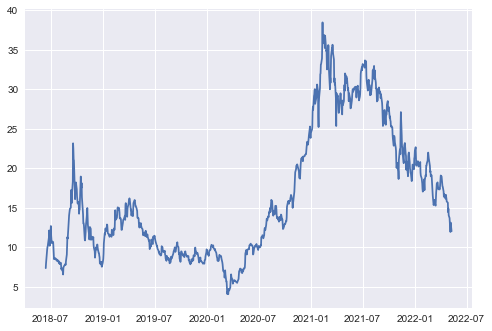

In [6]:
plt.plot(df_gtbif['gtbif_Close'])

## GTBIF and DJIX

In [7]:
df_dow = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_dow.csv')
df_dow['Date'] = pd.to_datetime(df_dow['Date'])
df_dow = df_dow.set_index('Date')
df_dow

djix_Open  djix_High  djix_Low  djix_Close  djix_Volume  \
Date                                                                  
1896-05-27      29.39      29.39     29.39       29.39          NaN   
1896-05-28      29.11      29.11     29.11       29.11          NaN   
1896-05-29      29.43      29.43     29.43       29.43          NaN   
1896-06-01      29.40      29.40     29.40       29.40          NaN   
1896-06-02      29.00      29.00     29.00       29.00          NaN   
...               ...        ...       ...         ...          ...   
2022-05-04   33171.80   34117.74  33021.84    34061.06  479098068.0   
2022-05-05   33854.17   33854.17  32685.10    32997.97  507031169.0   
2022-05-06   32773.88   33055.84  32474.69    32899.37  457941820.0   
2022-05-09   32685.17   32685.17  32121.98    32245.70  535207901.0   
2022-05-10   32504.09   32752.17  31887.89    32160.74  493104054.0   

            djix_prev_close  djix_next_close  djix_diff  djix_%change  \
Date                                                                    
1896-05-27              NaN            29.11        NaN           NaN   
1896-05-28            29.39            29.43      -0.28     -0.009527   
1896-05-29            29.11            29.40       0.32      0.010993   
1896-06-01            29.43            29.00      -0.03     -0.001019   
1896-06-02            29.40            28.80      -0.40     -0.013605   
...                     ...              ...        ...           ...   
2022-05-04         33128.79         32997.97     932.27      0.028141   
2022-05-05         34061.06         32899.37   -1063.09     -0.031211   
2022-05-06         32997.97         32245.70     -98.60     -0.002988   
2022-05-09         32899.37         32160.74    -653.67     -0.019869   
2022-05-10         32245.70              NaN     -84.96     -0.002635   

            djix_5day_avg_close  djix_5day_avg_diff  djix_10day_avg_close  \
Date                                                                        
1896-05-27                  NaN                 NaN                   NaN   
1896-05-28                  NaN                 NaN                   NaN   
1896-05-29                  NaN                 NaN                   NaN   
1896-06-01                  NaN                 NaN                   NaN   
1896-06-02               29.266                 NaN                   NaN   
...                         ...                 ...                   ...   
2022-05-04            33428.990             151.826             33634.068   
2022-05-05            33245.306            -183.684             33454.589   
2022-05-06            33229.738             -15.568             33363.386   
2022-05-09            33066.578            -163.160             33183.010   
2022-05-10            32872.968            -193.610             33075.066   

            djix_10day_avg_diff  
Date                             
1896-05-27                  NaN  
1896-05-28                  NaN  
1896-05-29                  NaN  
1896-06-01                  NaN  
1896-06-02                  NaN  
...                         ...  
2022-05-04             -109.973  
2022-05-05             -179.479  
2022-05-06              -91.203  
2022-05-09             -180.376  
2022-05-10             -107.944  

[32631 rows x 13 columns]

In [8]:
df0 = pd.merge(df_gtbif, df_dow, on='Date', how='left')
df0

gtbif_Open  gtbif_High  gtbif_Low  gtbif_Close  gtbif_Volume  \
Date                                                                       
2018-06-14       7.352       7.557      7.140        7.376         90300   
2018-06-15       7.537       7.973      7.293        7.973         71700   
2018-06-18       8.346       9.395      8.029        9.395        147600   
2018-06-19       9.765      10.920      9.529        9.729        137300   
2018-06-20      10.461      10.461      9.958       10.040         57500   
...                ...         ...        ...          ...           ...   
2022-05-03      13.500      13.790     12.900       13.040        318400   
2022-05-04      13.190      13.210     12.640       12.820        573000   
2022-05-05      13.050      13.050     11.728       11.950        935700   
2022-05-06      12.090      13.140     11.520       13.130        630500   
2022-05-09      12.990      12.990     11.950       12.040        559800   

            gtbif_prev_close  gtbif_next_close  gtbif_diff  gtbif_%change  \
Date                                                                        
2018-06-14               NaN             7.973         NaN            NaN   
2018-06-15             7.376             9.395       0.597       0.080938   
2018-06-18             7.973             9.729       1.422       0.178352   
2018-06-19             9.395            10.040       0.334       0.035551   
2018-06-20             9.729            10.140       0.311       0.031966   
...                      ...               ...         ...            ...   
2022-05-03            13.710            12.820      -0.670      -0.048869   
2022-05-04            13.040            11.950      -0.220      -0.016871   
2022-05-05            12.820            13.130      -0.870      -0.067863   
2022-05-06            11.950            12.040       1.180       0.098745   
2022-05-09            13.130               NaN      -1.090      -0.083016   

            gtbif_5day_avg_close  gtbif_5day_avg_diff  gtbif_10day_avg_close  \
Date                                                                           
2018-06-14                   NaN                  NaN                    NaN   
2018-06-15                   NaN                  NaN                    NaN   
2018-06-18                   NaN                  NaN                    NaN   
2018-06-19                   NaN                  NaN                    NaN   
2018-06-20                8.9026                  NaN                    NaN   
...                          ...                  ...                    ...   
2022-05-03               14.0334              -0.5200                14.9857   
2022-05-04               13.7054              -0.3280                14.6277   
2022-05-05               13.1140              -0.5914                14.2077   
2022-05-06               12.9300              -0.1840                13.9407   
2022-05-09               12.5960              -0.3340                13.5747   

            gtbif_10day_avg_diff  djix_Open  djix_High  djix_Low  djix_Close  \
Date                                                                           
2018-06-14                   NaN   25254.65   25332.50  25138.60    25175.31   
2018-06-15                   NaN   25116.71   25130.82  24894.38    25090.48   
2018-06-18                   NaN   24944.28   25003.10  24825.77    24987.47   
2018-06-19                   NaN   24763.59   24763.59  24567.75    24700.21   
2018-06-20                   NaN   24771.17   24804.76  24628.39    24657.80   
...                          ...        ...        ...       ...         ...   
2022-05-03                -0.361   33086.09   33341.58  32914.75    33128.79   
2022-05-04                -0.358   33171.80   34117.74  33021.84    34061.06   
2022-05-05                -0.420   33854.17   33854.17  32685.10    32997.97   
2022-05-06                -0.267   32773.88   33055.84  32474.69    32899.37   
2022-05-09          

In [9]:
df_isna0 = df0.isna()
df_isna0

gtbif_Open  gtbif_High  gtbif_Low  gtbif_Close  gtbif_Volume  \
Date                                                                       
2018-06-14       False       False      False        False         False   
2018-06-15       False       False      False        False         False   
2018-06-18       False       False      False        False         False   
2018-06-19       False       False      False        False         False   
2018-06-20       False       False      False        False         False   
...                ...         ...        ...          ...           ...   
2022-05-03       False       False      False        False         False   
2022-05-04       False       False      False        False         False   
2022-05-05       False       False      False        False         False   
2022-05-06       False       False      False        False         False   
2022-05-09       False       False      False        False         False   

            gtbif_prev_close  gtbif_next_close  gtbif_diff  gtbif_%change  \
Date                                                                        
2018-06-14              True             False        True           True   
2018-06-15             False             False       False          False   
2018-06-18             False             False       False          False   
2018-06-19             False             False       False          False   
2018-06-20             False             False       False          False   
...                      ...               ...         ...            ...   
2022-05-03             False             False       False          False   
2022-05-04             False             False       False          False   
2022-05-05             False             False       False          False   
2022-05-06             False             False       False          False   
2022-05-09             False              True       False          False   

            gtbif_5day_avg_close  gtbif_5day_avg_diff  gtbif_10day_avg_close  \
Date                                                                           
2018-06-14                  True                 True                   True   
2018-06-15                  True                 True                   True   
2018-06-18                  True                 True                   True   
2018-06-19                  True                 True                   True   
2018-06-20                 False                 True                   True   
...                          ...                  ...                    ...   
2022-05-03                 False                False                  False   
2022-05-04                 False                False                  False   
2022-05-05                 False                False                  False   
2022-05-06                 False                False                  False   
2022-05-09                 False                False                  False   

            gtbif_10day_avg_diff  djix_Open  djix_High  djix_Low  djix_Close  \
Date                                                                           
2018-06-14                  True      False      False     False       False   
2018-06-15                  True      False      False     False       False   
2018-06-18                  True      False      False     False       False   
2018-06-19                  True      False      False     False       False   
2018-06-20                  True      False      False     False       False   
...                          ...        ...        ...       ...         ...   
2022-05-03                 False      False      False     False       False   
2022-05-04                 False      False      False     False       False   
2022-05-05                 False      False      False     False       False   
2022-05-06                 False      False      False     False       False   
2022-05-09          

In [10]:
df_isna0 = df_isna0.add_suffix('_b')

In [11]:
df0 = df0.fillna(0)
df0.head()

gtbif_Open  gtbif_High  gtbif_Low  gtbif_Close  gtbif_Volume  \
Date                                                                       
2018-06-14       7.352       7.557      7.140        7.376         90300   
2018-06-15       7.537       7.973      7.293        7.973         71700   
2018-06-18       8.346       9.395      8.029        9.395        147600   
2018-06-19       9.765      10.920      9.529        9.729        137300   
2018-06-20      10.461      10.461      9.958       10.040         57500   

            gtbif_prev_close  gtbif_next_close  gtbif_diff  gtbif_%change  \
Date                                                                        
2018-06-14             0.000             7.973       0.000       0.000000   
2018-06-15             7.376             9.395       0.597       0.080938   
2018-06-18             7.973             9.729       1.422       0.178352   
2018-06-19             9.395            10.040       0.334       0.035551   
2018-06-20             9.729            10.140       0.311       0.031966   

            gtbif_5day_avg_close  gtbif_5day_avg_diff  gtbif_10day_avg_close  \
Date                                                                           
2018-06-14                0.0000                  0.0                    0.0   
2018-06-15                0.0000                  0.0                    0.0   
2018-06-18                0.0000                  0.0                    0.0   
2018-06-19                0.0000                  0.0                    0.0   
2018-06-20                8.9026                  0.0                    0.0   

            gtbif_10day_avg_diff  djix_Open  djix_High  djix_Low  djix_Close  \
Date                                                                           
2018-06-14                   0.0   25254.65   25332.50  25138.60    25175.31   
2018-06-15                   0.0   25116.71   25130.82  24894.38    25090.48   
2018-06-18                   0.0   24944.28   25003.10  24825.77    24987.47   
2018-06-19                   0.0   24763.59   24763.59  24567.75    24700.21   
2018-06-20                   0.0   24771.17   24804.76  24628.39    24657.80   

            djix_Volume  djix_prev_close  djix_next_close  djix_diff  \
Date                                                                   
2018-06-14  341117350.0         25201.20         25090.48     -25.89   
2018-06-15  659457895.0         25175.31         24987.47     -84.83   
2018-06-18  336974005.0         25090.48         24700.21    -103.01   
2018-06-19  376415787.0         24987.47         24657.80    -287.26   
2018-06-20  359445573.0         24700.21         24461.70     -42.41   

            djix_%change  djix_5day_avg_close  djix_5day_avg_diff  \
Date                                                                
2018-06-14     -0.001027            25267.216             -13.220   
2018-06-15     -0.003370            25222.006             -45.210   
2018-06-18     -0.004106            25155.038             -66.968   
2018-06-19     -0.011496            25030.934            -124.104   
2018-06-20     -0.001717            24922.254            -108.680   

            djix_10day_avg_close  djix_10day_avg_diff  
Date                                                   
2018-06-14             25097.276               75.947  
2018-06-15             25142.803               45.527  
2018-06-18             25160.181               17.378  
2018-06-19             25150.204               -9.977  
2018-06-20             25101.345              -48.859

In [12]:
df0 = pd.concat([df0, df_isna0], axis=1)
df0

gtbif_Open  gtbif_High  gtbif_Low  gtbif_Close  gtbif_Volume  \
Date                                                                       
2018-06-14       7.352       7.557      7.140        7.376         90300   
2018-06-15       7.537       7.973      7.293        7.973         71700   
2018-06-18       8.346       9.395      8.029        9.395        147600   
2018-06-19       9.765      10.920      9.529        9.729        137300   
2018-06-20      10.461      10.461      9.958       10.040         57500   
...                ...         ...        ...          ...           ...   
2022-05-03      13.500      13.790     12.900       13.040        318400   
2022-05-04      13.190      13.210     12.640       12.820        573000   
2022-05-05      13.050      13.050     11.728       11.950        935700   
2022-05-06      12.090      13.140     11.520       13.130        630500   
2022-05-09      12.990      12.990     11.950       12.040        559800   

            gtbif_prev_close  gtbif_next_close  gtbif_diff  gtbif_%change  \
Date                                                                        
2018-06-14             0.000             7.973       0.000       0.000000   
2018-06-15             7.376             9.395       0.597       0.080938   
2018-06-18             7.973             9.729       1.422       0.178352   
2018-06-19             9.395            10.040       0.334       0.035551   
2018-06-20             9.729            10.140       0.311       0.031966   
...                      ...               ...         ...            ...   
2022-05-03            13.710            12.820      -0.670      -0.048869   
2022-05-04            13.040            11.950      -0.220      -0.016871   
2022-05-05            12.820            13.130      -0.870      -0.067863   
2022-05-06            11.950            12.040       1.180       0.098745   
2022-05-09            13.130             0.000      -1.090      -0.083016   

            gtbif_5day_avg_close  gtbif_5day_avg_diff  gtbif_10day_avg_close  \
Date                                                                           
2018-06-14                0.0000               0.0000                 0.0000   
2018-06-15                0.0000               0.0000                 0.0000   
2018-06-18                0.0000               0.0000                 0.0000   
2018-06-19                0.0000               0.0000                 0.0000   
2018-06-20                8.9026               0.0000                 0.0000   
...                          ...                  ...                    ...   
2022-05-03               14.0334              -0.5200                14.9857   
2022-05-04               13.7054              -0.3280                14.6277   
2022-05-05               13.1140              -0.5914                14.2077   
2022-05-06               12.9300              -0.1840                13.9407   
2022-05-09               12.5960              -0.3340                13.5747   

            gtbif_10day_avg_diff  djix_Open  djix_High  djix_Low  djix_Close  \
Date                                                                           
2018-06-14                 0.000   25254.65   25332.50  25138.60    25175.31   
2018-06-15                 0.000   25116.71   25130.82  24894.38    25090.48   
2018-06-18                 0.000   24944.28   25003.10  24825.77    24987.47   
2018-06-19                 0.000   24763.59   24763.59  24567.75    24700.21   
2018-06-20                 0.000   24771.17   24804.76  24628.39    24657.80   
...                          ...        ...        ...       ...         ...   
2022-05-03                -0.361   33086.09   33341.58  32914.75    33128.79   
2022-05-04                -0.358   33171.80   34117.74  33021.84    34061.06   
2022-05-05                -0.420   33854.17   33854.17  32685.10    32997.97   
2022-05-06                -0.267   32773.88   33055.84  32474.69    32899.37   
2022-05-09          

In [13]:
df0['month'] = df0.index.month
df0['day'] = df0.index.day
df0['year'] = df0.index.year
df0['quarter'] = (df0['month']-1)//3 + 1

In [14]:
cols = df0.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'gtbif_Open']

In [15]:
df0 = df0[cols].copy()
df0.head()

month  day  year  quarter  gtbif_Open  gtbif_High  gtbif_Low  \
Date                                                                       
2018-06-14      6   14  2018        2       7.352       7.557      7.140   
2018-06-15      6   15  2018        2       7.537       7.973      7.293   
2018-06-18      6   18  2018        2       8.346       9.395      8.029   
2018-06-19      6   19  2018        2       9.765      10.920      9.529   
2018-06-20      6   20  2018        2      10.461      10.461      9.958   

            gtbif_Close  gtbif_Volume  gtbif_prev_close  gtbif_next_close  \
Date                                                                        
2018-06-14        7.376         90300             0.000             7.973   
2018-06-15        7.973         71700             7.376             9.395   
2018-06-18        9.395        147600             7.973             9.729   
2018-06-19        9.729        137300             9.395            10.040   
2018-06-20       10.040         57500             9.729            10.140   

            gtbif_diff  gtbif_%change  gtbif_5day_avg_close  \
Date                                                          
2018-06-14       0.000       0.000000                0.0000   
2018-06-15       0.597       0.080938                0.0000   
2018-06-18       1.422       0.178352                0.0000   
2018-06-19       0.334       0.035551                0.0000   
2018-06-20       0.311       0.031966                8.9026   

            gtbif_5day_avg_diff  gtbif_10day_avg_close  gtbif_10day_avg_diff  \
Date                                                                           
2018-06-14                  0.0                    0.0                   0.0   
2018-06-15                  0.0                    0.0                   0.0   
2018-06-18                  0.0                    0.0                   0.0   
2018-06-19                  0.0                    0.0                   0.0   
2018-06-20                  0.0                    0.0                   0.0   

            djix_Open  djix_High  djix_Low  djix_Close  djix_Volume  \
Date                                                                  
2018-06-14   25254.65   25332.50  25138.60    25175.31  341117350.0   
2018-06-15   25116.71   25130.82  24894.38    25090.48  659457895.0   
2018-06-18   24944.28   25003.10  24825.77    24987.47  336974005.0   
2018-06-19   24763.59   24763.59  24567.75    24700.21  376415787.0   
2018-06-20   24771.17   24804.76  24628.39    24657.80  359445573.0   

            djix_prev_close  djix_next_close  djix_diff  djix_%change  \
Date                                                                    
2018-06-14         25201.20         25090.48     -25.89     -0.001027   
2018-06-15         25175.31         24987.47     -84.83     -0.003370   
2018-06-18         25090.48         24700.21    -103.01     -0.004106   
2018-06-19         24987.47         24657.80    -287.26     -0.011496   
2018-06-20         24700.21         24461.70     -42.41     -0.001717   

            djix_5day_avg_close  djix_5day_avg_diff  djix_10day_avg_close  \
Date                                                                        
2018-06-14            25267.216             -13.220             25097.276   
2018-06-15            25222.006             -45.210             25142.803   
2018-06-18            25155.038             -66.968             25160.181   
2018-06-19            25030.934            -124.104             25150.204   
2018-06-20            24922.254            -108.680             25101.345   

            djix_10day_avg_diff  gtbif_Open_b  gtbif_High_b  gtbif_Low_b  \
Date                                                                       
2018-06-14               75.947         False         False        False   
2018-06-15               45.527         False         False        False   
2018-06-18               17.378         False         False        False   
2018-0

In [16]:
df0.drop(df0.tail(1).index, inplace=True)

In [17]:
df0.shape

(982, 56)

In [18]:
n = int(len(df0) * 0.9)
n

883

In [19]:
train0 = df0[:n]
test0 = df0[n:]

In [20]:
print(len(train0))
print(len(test0))

883
99


In [21]:
X_train0 = train0.drop('gtbif_next_close', axis=1)
X_train0.head(3)

month  day  year  quarter  gtbif_Open  gtbif_High  gtbif_Low  \
Date                                                                       
2018-06-14      6   14  2018        2       7.352       7.557      7.140   
2018-06-15      6   15  2018        2       7.537       7.973      7.293   
2018-06-18      6   18  2018        2       8.346       9.395      8.029   

            gtbif_Close  gtbif_Volume  gtbif_prev_close  gtbif_diff  \
Date                                                                  
2018-06-14        7.376         90300             0.000       0.000   
2018-06-15        7.973         71700             7.376       0.597   
2018-06-18        9.395        147600             7.973       1.422   

            gtbif_%change  gtbif_5day_avg_close  gtbif_5day_avg_diff  \
Date                                                                   
2018-06-14       0.000000                   0.0                  0.0   
2018-06-15       0.080938                   0.0                  0.0   
2018-06-18       0.178352                   0.0                  0.0   

            gtbif_10day_avg_close  gtbif_10day_avg_diff  djix_Open  djix_High  \
Date                                                                            
2018-06-14                    0.0                   0.0   25254.65   25332.50   
2018-06-15                    0.0                   0.0   25116.71   25130.82   
2018-06-18                    0.0                   0.0   24944.28   25003.10   

            djix_Low  djix_Close  djix_Volume  djix_prev_close  \
Date                                                             
2018-06-14  25138.60    25175.31  341117350.0         25201.20   
2018-06-15  24894.38    25090.48  659457895.0         25175.31   
2018-06-18  24825.77    24987.47  336974005.0         25090.48   

            djix_next_close  djix_diff  djix_%change  djix_5day_avg_close  \
Date                                                                        
2018-06-14         25090.48     -25.89     -0.001027            25267.216   
2018-06-15         24987.47     -84.83     -0.003370            25222.006   
2018-06-18         24700.21    -103.01     -0.004106            25155.038   

            djix_5day_avg_diff  djix_10day_avg_close  djix_10day_avg_diff  \
Date                                                                        
2018-06-14             -13.220             25097.276               75.947   
2018-06-15             -45.210             25142.803               45.527   
2018-06-18             -66.968             25160.181               17.378   

            gtbif_Open_b  gtbif_High_b  gtbif_Low_b  gtbif_Close_b  \
Date                                                                 
2018-06-14         False         False        False          False   
2018-06-15         False         False        False          False   
2018-06-18         False         False        False          False   

            gtbif_Volume_b  gtbif_prev_close_b  gtbif_next_close_b  \
Date                                                                 
2018-06-14           False                True               False   
2018-06-15           False               False               False   
2018-06-18           False               False               False   

            gtbif_diff_b  gtbif_%change_b  gtbif_5day_avg_close_b  \
Date                                                                
2018-06-14          True             True                    True   
2018-06-15         False            False                    True   
2018-06-18         False            False                    True   

            gtbif_5day_avg_diff_b  gtbif_10day_avg_close_b  \
Date                                                         
2018-06-14                   True                     True   
2018-06-15                   True                     True   
2018-06-18                   True                     True   

            gtbif_10day_avg_diff_b  djix_Open_

In [22]:
X_train0.shape

(883, 55)

In [23]:
y_train0 = train0['gtbif_next_close']
y_train0.head(3)

Date
2018-06-14    7.973
2018-06-15    9.395
2018-06-18    9.729
Name: gtbif_next_close, dtype: float64

In [24]:
y_train0.tail(3)

Date
2021-12-10    20.754999
2021-12-13    19.980000
2021-12-14    19.780001
Name: gtbif_next_close, dtype: float64

In [25]:
X_test0 = test0.drop('gtbif_next_close', axis=1)
y_test0 = test0['gtbif_next_close']

In [26]:
X_test0.head(3)

month  day  year  quarter  gtbif_Open  gtbif_High  gtbif_Low  \
Date                                                                       
2021-12-15     12   15  2021        4       19.15   20.350000  19.090000   
2021-12-16     12   16  2021        4       20.76   20.780001  19.110001   
2021-12-17     12   17  2021        4       19.18   19.770000  18.799999   

            gtbif_Close  gtbif_Volume  gtbif_prev_close  gtbif_diff  \
Date                                                                  
2021-12-15    19.780001        450800         19.980000   -0.199999   
2021-12-16    19.410000       3795400         19.780001   -0.370001   
2021-12-17    19.400000        625600         19.410000   -0.010000   

            gtbif_%change  gtbif_5day_avg_close  gtbif_5day_avg_diff  \
Date                                                                   
2021-12-15      -0.010010                20.873              -0.3484   
2021-12-16      -0.018706                20.385              -0.4880   
2021-12-17      -0.000515                19.865              -0.5200   

            gtbif_10day_avg_close  gtbif_10day_avg_diff  djix_Open  djix_High  \
Date                                                                            
2021-12-15                20.5797                -0.004   35549.35   35943.84   
2021-12-16                20.4317                -0.148   36036.28   36189.83   
2021-12-17                20.3077                -0.124   35800.11   35800.11   

            djix_Low  djix_Close  djix_Volume  djix_prev_close  \
Date                                                             
2021-12-15  35389.30    35927.43  526041801.0         35544.18   
2021-12-16  35778.21    35897.64  569730409.0         35927.43   
2021-12-17  35284.26    35365.44  896157975.0         35897.64   

            djix_next_close  djix_diff  djix_%change  djix_5day_avg_close  \
Date                                                                        
2021-12-15         35897.64     383.25      0.010782            35769.648   
2021-12-16         35365.44     -29.79     -0.000829            35798.238   
2021-12-17         34932.16    -532.20     -0.014825            35677.128   

            djix_5day_avg_diff  djix_10day_avg_close  djix_10day_avg_diff  \
Date                                                                        
2021-12-15              34.536             35476.932              190.539   
2021-12-16              28.590             35602.717              125.785   
2021-12-17            -121.110             35681.253               78.536   

            gtbif_Open_b  gtbif_High_b  gtbif_Low_b  gtbif_Close_b  \
Date                                                                 
2021-12-15         False         False        False          False   
2021-12-16         False         False        False          False   
2021-12-17         False         False        False          False   

            gtbif_Volume_b  gtbif_prev_close_b  gtbif_next_close_b  \
Date                                                                 
2021-12-15           False               False               False   
2021-12-16           False               False               False   
2021-12-17           False               False               False   

            gtbif_diff_b  gtbif_%change_b  gtbif_5day_avg_close_b  \
Date                                                                
2021-12-15         False            False                   False   
2021-12-16         False            False                   False   
2021-12-17         False            False                   False   

            gtbif_5day_avg_diff_b  gtbif_10day_avg_close_b  \
Date                                                         
2021-12-15                  False                    False   
2021-12-16                  False                    False   
2021-12-17                  False                    False   

            gtbif_10day_avg_diff_b  djix_Open_

In [27]:
X_test0.shape

(99, 55)

In [28]:
y_test0.tail(3)

Date
2022-05-04    11.95
2022-05-05    13.13
2022-05-06    12.04
Name: gtbif_next_close, dtype: float64

In [29]:
from sklearn.linear_model import LinearRegression
hyper_table = list()

In [30]:
model0 = LinearRegression()
model0.fit(X_train0, y_train0)
y_pred0 = model0.predict(X_test0)

In [31]:
y_pred0[:5]

array([19.86200959, 20.87300459, 19.21254404, 18.65071245, 18.80849146])

In [32]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man0 = rmse_manual(y_test0, y_pred0)
print(rmse_man0)

0.6025326682802103


In [33]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man0 = mae_manual(y_test0, y_pred0)
print(mae_man0)

0.4802677552442712


In [34]:
hyper_table.append(dict(version='1+Dow',
                        model=model0, 
                        rmse=rmse_man0,
                        mae=mae_man0,
                        rows=df0.shape[0], 
                        train_rows=X_train0.shape[0],
                        test_rows=X_test0.shape[0],
                        columns=df0.shape[1]))

In [35]:
y_train0 = pd.DataFrame(y_train0, columns=['gtbif_next_close'])
y_test0 = pd.DataFrame(y_test0, columns=['gtbif_next_close'])

In [36]:
y_test0['gtbif_pred_next_close'] = y_pred0

In [37]:
y_test0.tail()

gtbif_next_close  gtbif_pred_next_close
Date                                               
2022-05-02             13.04              13.769969
2022-05-03             12.82              13.473669
2022-05-04             11.95              12.702638
2022-05-05             13.13              12.057659
2022-05-06             12.04              13.125613

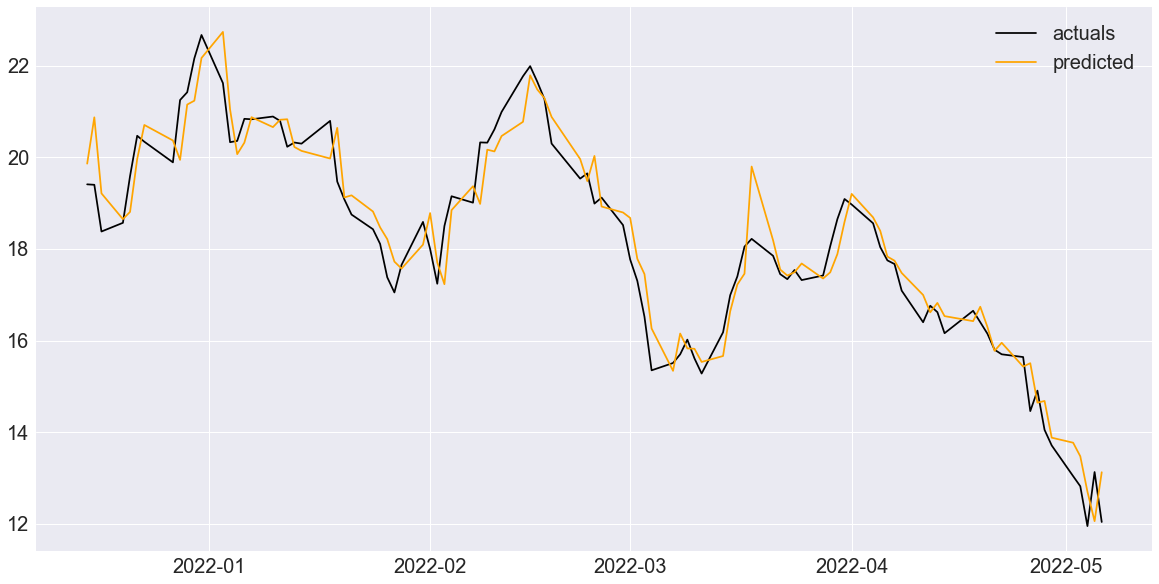

In [38]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test0['gtbif_next_close'], color='black')
ax.plot(y_test0['gtbif_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## GTBIF and Cannabis ETFs

In [39]:
df_etfs = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_etfs.csv')
df_etfs['Date'] = pd.to_datetime(df_etfs['Date'])
df_etfs = df_etfs.set_index('Date')

In [40]:
df1 = pd.merge(df_gtbif, df_etfs, on='Date', how='left')
df1

gtbif_Open  gtbif_High  gtbif_Low  gtbif_Close  gtbif_Volume  \
Date                                                                       
2018-06-14       7.352       7.557      7.140        7.376         90300   
2018-06-15       7.537       7.973      7.293        7.973         71700   
2018-06-18       8.346       9.395      8.029        9.395        147600   
2018-06-19       9.765      10.920      9.529        9.729        137300   
2018-06-20      10.461      10.461      9.958       10.040         57500   
...                ...         ...        ...          ...           ...   
2022-05-03      13.500      13.790     12.900       13.040        318400   
2022-05-04      13.190      13.210     12.640       12.820        573000   
2022-05-05      13.050      13.050     11.728       11.950        935700   
2022-05-06      12.090      13.140     11.520       13.130        630500   
2022-05-09      12.990      12.990     11.950       12.040        559800   

            gtbif_prev_close  gtbif_next_close  gtbif_diff  gtbif_%change  \
Date                                                                        
2018-06-14               NaN             7.973         NaN            NaN   
2018-06-15             7.376             9.395       0.597       0.080938   
2018-06-18             7.973             9.729       1.422       0.178352   
2018-06-19             9.395            10.040       0.334       0.035551   
2018-06-20             9.729            10.140       0.311       0.031966   
...                      ...               ...         ...            ...   
2022-05-03            13.710            12.820      -0.670      -0.048869   
2022-05-04            13.040            11.950      -0.220      -0.016871   
2022-05-05            12.820            13.130      -0.870      -0.067863   
2022-05-06            11.950            12.040       1.180       0.098745   
2022-05-09            13.130               NaN      -1.090      -0.083016   

            gtbif_5day_avg_close  gtbif_5day_avg_diff  gtbif_10day_avg_close  \
Date                                                                           
2018-06-14                   NaN                  NaN                    NaN   
2018-06-15                   NaN                  NaN                    NaN   
2018-06-18                   NaN                  NaN                    NaN   
2018-06-19                   NaN                  NaN                    NaN   
2018-06-20                8.9026                  NaN                    NaN   
...                          ...                  ...                    ...   
2022-05-03               14.0334              -0.5200                14.9857   
2022-05-04               13.7054              -0.3280                14.6277   
2022-05-05               13.1140              -0.5914                14.2077   
2022-05-06               12.9300              -0.1840                13.9407   
2022-05-09               12.5960              -0.3340                13.5747   

            gtbif_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                           
2018-06-14                   NaN  30.379999  30.580000  30.051001  30.209999   
2018-06-15                   NaN  30.010000  30.330000  29.700001  29.990000   
2018-06-18                   NaN  29.950001  30.139999  29.761999  30.059999   
2018-06-19                   NaN  29.920000  30.389999  29.830000  30.209999   
2018-06-20                   NaN  31.000000  31.000000  30.318001  30.920000   
...                          ...        ...        ...        ...        ...   
2022-05-03                -0.361   8.340000   8.470000   8.240000   8.320000   
2022-05-04                -0.358   8.340000   8.590000   8.100000   8.590000   
2022-05-05                -0.420   8.500000   8.508000   8.010000   8.050000   
2022-05-06                -0.267   8.010000   8.050000   7.750000   7.900000   
2022-05-09          

In [41]:
df_isna1 = df1.isna()
df_isna1

gtbif_Open  gtbif_High  gtbif_Low  gtbif_Close  gtbif_Volume  \
Date                                                                       
2018-06-14       False       False      False        False         False   
2018-06-15       False       False      False        False         False   
2018-06-18       False       False      False        False         False   
2018-06-19       False       False      False        False         False   
2018-06-20       False       False      False        False         False   
...                ...         ...        ...          ...           ...   
2022-05-03       False       False      False        False         False   
2022-05-04       False       False      False        False         False   
2022-05-05       False       False      False        False         False   
2022-05-06       False       False      False        False         False   
2022-05-09       False       False      False        False         False   

            gtbif_prev_close  gtbif_next_close  gtbif_diff  gtbif_%change  \
Date                                                                        
2018-06-14              True             False        True           True   
2018-06-15             False             False       False          False   
2018-06-18             False             False       False          False   
2018-06-19             False             False       False          False   
2018-06-20             False             False       False          False   
...                      ...               ...         ...            ...   
2022-05-03             False             False       False          False   
2022-05-04             False             False       False          False   
2022-05-05             False             False       False          False   
2022-05-06             False             False       False          False   
2022-05-09             False              True       False          False   

            gtbif_5day_avg_close  gtbif_5day_avg_diff  gtbif_10day_avg_close  \
Date                                                                           
2018-06-14                  True                 True                   True   
2018-06-15                  True                 True                   True   
2018-06-18                  True                 True                   True   
2018-06-19                  True                 True                   True   
2018-06-20                 False                 True                   True   
...                          ...                  ...                    ...   
2022-05-03                 False                False                  False   
2022-05-04                 False                False                  False   
2022-05-05                 False                False                  False   
2022-05-06                 False                False                  False   
2022-05-09                 False                False                  False   

            gtbif_10day_avg_diff  mj_Open  mj_High  mj_Low  mj_Close  \
Date                                                                   
2018-06-14                  True    False    False   False     False   
2018-06-15                  True    False    False   False     False   
2018-06-18                  True    False    False   False     False   
2018-06-19                  True    False    False   False     False   
2018-06-20                  True    False    False   False     False   
...                          ...      ...      ...     ...       ...   
2022-05-03                 False    False    False   False     False   
2022-05-04                 False    False    False   False     False   
2022-05-05                 False    False    False   False     False   
2022-05-06                 False    False    False   False     False   
2022-05-09                 False    False    False   False     False   

            mj_Volume  mj_prev_close  mj_ne

In [42]:
df_isna1 = df_isna1.add_suffix('_b')

In [43]:
df1 = df1.fillna(0)
df1.head()

gtbif_Open  gtbif_High  gtbif_Low  gtbif_Close  gtbif_Volume  \
Date                                                                       
2018-06-14       7.352       7.557      7.140        7.376         90300   
2018-06-15       7.537       7.973      7.293        7.973         71700   
2018-06-18       8.346       9.395      8.029        9.395        147600   
2018-06-19       9.765      10.920      9.529        9.729        137300   
2018-06-20      10.461      10.461      9.958       10.040         57500   

            gtbif_prev_close  gtbif_next_close  gtbif_diff  gtbif_%change  \
Date                                                                        
2018-06-14             0.000             7.973       0.000       0.000000   
2018-06-15             7.376             9.395       0.597       0.080938   
2018-06-18             7.973             9.729       1.422       0.178352   
2018-06-19             9.395            10.040       0.334       0.035551   
2018-06-20             9.729            10.140       0.311       0.031966   

            gtbif_5day_avg_close  gtbif_5day_avg_diff  gtbif_10day_avg_close  \
Date                                                                           
2018-06-14                0.0000                  0.0                    0.0   
2018-06-15                0.0000                  0.0                    0.0   
2018-06-18                0.0000                  0.0                    0.0   
2018-06-19                0.0000                  0.0                    0.0   
2018-06-20                8.9026                  0.0                    0.0   

            gtbif_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                           
2018-06-14                   0.0  30.379999  30.580000  30.051001  30.209999   
2018-06-15                   0.0  30.010000  30.330000  29.700001  29.990000   
2018-06-18                   0.0  29.950001  30.139999  29.761999  30.059999   
2018-06-19                   0.0  29.920000  30.389999  29.830000  30.209999   
2018-06-20                   0.0  31.000000  31.000000  30.318001  30.920000   

            mj_Volume  mj_prev_close  mj_next_close   mj_diff  mj_%change  \
Date                                                                        
2018-06-14     195500      30.299999      29.990000 -0.090000   -0.002970   
2018-06-15     167900      30.209999      30.059999 -0.219999   -0.007282   
2018-06-18      79500      29.990000      30.209999  0.069999    0.002334   
2018-06-19     147400      30.059999      30.920000  0.150000    0.004990   
2018-06-20     262700      30.209999      31.719999  0.710001    0.023502   

            mj_5day_avg_close  mj_5day_avg_diff  mj_10day_avg_close  \
Date                                                                  
2018-06-14          30.697999            -0.312           30.832999   
2018-06-15          30.395999            -0.302           30.877000   
2018-06-18          30.197999            -0.198           30.868000   
2018-06-19          30.153999            -0.044           30.777999   
2018-06-20          30.277999             0.124           30.643999   

            mj_10day_avg_diff  msos_Open  msos_High  msos_Low  msos_Close  \
Date                                                                        
2018-06-14              0.040        0.0        0.0       0.0         0.0   
2018-06-15              0.044        0.0        0.0       0.0         0.0   
2018-06-18             -0.009        0.0        0.0       0.0         0.0   
2018-06-19             -0.090        0.0        0.0       0.0         0.0   
2018-06-20             -0.134        0.0        0.0       0.0         0.0   

            msos_Volume  msos_prev_close  msos_next_close  msos_diff  \
Date                                                                   
2018-06-14          0.0              0.0              0.0        0.0   
2018-06-15          0.0

In [44]:
df1 = pd.concat([df1, df_isna1], axis=1)
df1

gtbif_Open  gtbif_High  gtbif_Low  gtbif_Close  gtbif_Volume  \
Date                                                                       
2018-06-14       7.352       7.557      7.140        7.376         90300   
2018-06-15       7.537       7.973      7.293        7.973         71700   
2018-06-18       8.346       9.395      8.029        9.395        147600   
2018-06-19       9.765      10.920      9.529        9.729        137300   
2018-06-20      10.461      10.461      9.958       10.040         57500   
...                ...         ...        ...          ...           ...   
2022-05-03      13.500      13.790     12.900       13.040        318400   
2022-05-04      13.190      13.210     12.640       12.820        573000   
2022-05-05      13.050      13.050     11.728       11.950        935700   
2022-05-06      12.090      13.140     11.520       13.130        630500   
2022-05-09      12.990      12.990     11.950       12.040        559800   

            gtbif_prev_close  gtbif_next_close  gtbif_diff  gtbif_%change  \
Date                                                                        
2018-06-14             0.000             7.973       0.000       0.000000   
2018-06-15             7.376             9.395       0.597       0.080938   
2018-06-18             7.973             9.729       1.422       0.178352   
2018-06-19             9.395            10.040       0.334       0.035551   
2018-06-20             9.729            10.140       0.311       0.031966   
...                      ...               ...         ...            ...   
2022-05-03            13.710            12.820      -0.670      -0.048869   
2022-05-04            13.040            11.950      -0.220      -0.016871   
2022-05-05            12.820            13.130      -0.870      -0.067863   
2022-05-06            11.950            12.040       1.180       0.098745   
2022-05-09            13.130             0.000      -1.090      -0.083016   

            gtbif_5day_avg_close  gtbif_5day_avg_diff  gtbif_10day_avg_close  \
Date                                                                           
2018-06-14                0.0000               0.0000                 0.0000   
2018-06-15                0.0000               0.0000                 0.0000   
2018-06-18                0.0000               0.0000                 0.0000   
2018-06-19                0.0000               0.0000                 0.0000   
2018-06-20                8.9026               0.0000                 0.0000   
...                          ...                  ...                    ...   
2022-05-03               14.0334              -0.5200                14.9857   
2022-05-04               13.7054              -0.3280                14.6277   
2022-05-05               13.1140              -0.5914                14.2077   
2022-05-06               12.9300              -0.1840                13.9407   
2022-05-09               12.5960              -0.3340                13.5747   

            gtbif_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                           
2018-06-14                 0.000  30.379999  30.580000  30.051001  30.209999   
2018-06-15                 0.000  30.010000  30.330000  29.700001  29.990000   
2018-06-18                 0.000  29.950001  30.139999  29.761999  30.059999   
2018-06-19                 0.000  29.920000  30.389999  29.830000  30.209999   
2018-06-20                 0.000  31.000000  31.000000  30.318001  30.920000   
...                          ...        ...        ...        ...        ...   
2022-05-03                -0.361   8.340000   8.470000   8.240000   8.320000   
2022-05-04                -0.358   8.340000   8.590000   8.100000   8.590000   
2022-05-05                -0.420   8.500000   8.508000   8.010000   8.050000   
2022-05-06                -0.267   8.010000   8.050000   7.750000   7.900000   
2022-05-09          

In [45]:
df1['month'] = df1.index.month
df1['day'] = df1.index.day
df1['year'] = df1.index.year
df1['quarter'] = (df1['month']-1)//3 + 1

In [46]:
cols = df1.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'gtbif_Open']

In [47]:
df1 = df1[cols].copy()
df1

month  day  year  quarter  gtbif_Open  gtbif_High  gtbif_Low  \
Date                                                                       
2018-06-14      6   14  2018        2       7.352       7.557      7.140   
2018-06-15      6   15  2018        2       7.537       7.973      7.293   
2018-06-18      6   18  2018        2       8.346       9.395      8.029   
2018-06-19      6   19  2018        2       9.765      10.920      9.529   
2018-06-20      6   20  2018        2      10.461      10.461      9.958   
...           ...  ...   ...      ...         ...         ...        ...   
2022-05-03      5    3  2022        2      13.500      13.790     12.900   
2022-05-04      5    4  2022        2      13.190      13.210     12.640   
2022-05-05      5    5  2022        2      13.050      13.050     11.728   
2022-05-06      5    6  2022        2      12.090      13.140     11.520   
2022-05-09      5    9  2022        2      12.990      12.990     11.950   

            gtbif_Close  gtbif_Volume  gtbif_prev_close  gtbif_next_close  \
Date                                                                        
2018-06-14        7.376         90300             0.000             7.973   
2018-06-15        7.973         71700             7.376             9.395   
2018-06-18        9.395        147600             7.973             9.729   
2018-06-19        9.729        137300             9.395            10.040   
2018-06-20       10.040         57500             9.729            10.140   
...                 ...           ...               ...               ...   
2022-05-03       13.040        318400            13.710            12.820   
2022-05-04       12.820        573000            13.040            11.950   
2022-05-05       11.950        935700            12.820            13.130   
2022-05-06       13.130        630500            11.950            12.040   
2022-05-09       12.040        559800            13.130             0.000   

            gtbif_diff  gtbif_%change  gtbif_5day_avg_close  \
Date                                                          
2018-06-14       0.000       0.000000                0.0000   
2018-06-15       0.597       0.080938                0.0000   
2018-06-18       1.422       0.178352                0.0000   
2018-06-19       0.334       0.035551                0.0000   
2018-06-20       0.311       0.031966                8.9026   
...                ...            ...                   ...   
2022-05-03      -0.670      -0.048869               14.0334   
2022-05-04      -0.220      -0.016871               13.7054   
2022-05-05      -0.870      -0.067863               13.1140   
2022-05-06       1.180       0.098745               12.9300   
2022-05-09      -1.090      -0.083016               12.5960   

            gtbif_5day_avg_diff  gtbif_10day_avg_close  gtbif_10day_avg_diff  \
Date                                                                           
2018-06-14               0.0000                 0.0000                 0.000   
2018-06-15               0.0000                 0.0000                 0.000   
2018-06-18               0.0000                 0.0000                 0.000   
2018-06-19               0.0000                 0.0000                 0.000   
2018-06-20               0.0000                 0.0000                 0.000   
...                         ...                    ...                   ...   
2022-05-03              -0.5200                14.9857                -0.361   
2022-05-04              -0.3280                14.6277                -0.358   
2022-05-05              -0.5914                14.2077                -0.420   
2022-05-06              -0.1840                13.9407                -0.267   
2022-05-09              -0.3340                13.5747                -0.366   

              mj_Open    mj_High     mj_Low   mj_Close  mj_Volume  \
Date                                                                
2018-06-14  30.379999 

In [48]:
df1.drop(df1.tail(1).index, inplace=True)

In [49]:
n = int(len(df1) * 0.9)
n

883

In [50]:
train1 = df1[:n]
test1 = df1[n:]

In [51]:
print(len(train1))
print(len(test1))

883
99


In [52]:
X_train1 = train1.drop('gtbif_next_close', axis=1)
X_train1.head(3)

month  day  year  quarter  gtbif_Open  gtbif_High  gtbif_Low  \
Date                                                                       
2018-06-14      6   14  2018        2       7.352       7.557      7.140   
2018-06-15      6   15  2018        2       7.537       7.973      7.293   
2018-06-18      6   18  2018        2       8.346       9.395      8.029   

            gtbif_Close  gtbif_Volume  gtbif_prev_close  gtbif_diff  \
Date                                                                  
2018-06-14        7.376         90300             0.000       0.000   
2018-06-15        7.973         71700             7.376       0.597   
2018-06-18        9.395        147600             7.973       1.422   

            gtbif_%change  gtbif_5day_avg_close  gtbif_5day_avg_diff  \
Date                                                                   
2018-06-14       0.000000                   0.0                  0.0   
2018-06-15       0.080938                   0.0                  0.0   
2018-06-18       0.178352                   0.0                  0.0   

            gtbif_10day_avg_close  gtbif_10day_avg_diff    mj_Open    mj_High  \
Date                                                                            
2018-06-14                    0.0                   0.0  30.379999  30.580000   
2018-06-15                    0.0                   0.0  30.010000  30.330000   
2018-06-18                    0.0                   0.0  29.950001  30.139999   

               mj_Low   mj_Close  mj_Volume  mj_prev_close  mj_next_close  \
Date                                                                        
2018-06-14  30.051001  30.209999     195500      30.299999      29.990000   
2018-06-15  29.700001  29.990000     167900      30.209999      30.059999   
2018-06-18  29.761999  30.059999      79500      29.990000      30.209999   

             mj_diff  mj_%change  mj_5day_avg_close  mj_5day_avg_diff  \
Date                                                                    
2018-06-14 -0.090000   -0.002970          30.697999            -0.312   
2018-06-15 -0.219999   -0.007282          30.395999            -0.302   
2018-06-18  0.069999    0.002334          30.197999            -0.198   

            mj_10day_avg_close  mj_10day_avg_diff  msos_Open  msos_High  \
Date                                                                      
2018-06-14           30.832999              0.040        0.0        0.0   
2018-06-15           30.877000              0.044        0.0        0.0   
2018-06-18           30.868000             -0.009        0.0        0.0   

            msos_Low  msos_Close  msos_Volume  msos_prev_close  \
Date                                                             
2018-06-14       0.0         0.0          0.0              0.0   
2018-06-15       0.0         0.0          0.0              0.0   
2018-06-18       0.0         0.0          0.0              0.0   

            msos_next_close  msos_diff  msos_%change  msos_5day_avg_close  \
Date                                                                        
2018-06-14              0.0        0.0           0.0                  0.0   
2018-06-15              0.0        0.0           0.0                  0.0   
2018-06-18              0.0        0.0           0.0                  0.0   

            msos_5day_avg_diff  msos_10day_avg_close  msos_10day_avg_diff  \
Date                                                                        
2018-06-14                 0.0                   0.0                  0.0   
2018-06-15                 0.0                   0.0                  0.0   
2018-06-18                 0.0                   0.0                  0.0   

            yolo_Open  yolo_High  yolo_Low  yolo_Close  yolo_Volume  \
Date                                                                  
2018-06-14        0.0        0.0       0.0         0.0          0.0   
2018-06-15        0.0        0.0       0.0         0.0          

In [53]:
X_train1.shape

(883, 159)

In [54]:
y_train1 = train1['gtbif_next_close']
y_train1.head(3)

Date
2018-06-14    7.973
2018-06-15    9.395
2018-06-18    9.729
Name: gtbif_next_close, dtype: float64

In [55]:
y_train1.tail(3)

Date
2021-12-10    20.754999
2021-12-13    19.980000
2021-12-14    19.780001
Name: gtbif_next_close, dtype: float64

In [56]:
X_test1 = test1.drop('gtbif_next_close', axis=1)
y_test1 = test1['gtbif_next_close']

In [57]:
X_test1.head(3)

month  day  year  quarter  gtbif_Open  gtbif_High  gtbif_Low  \
Date                                                                       
2021-12-15     12   15  2021        4       19.15   20.350000  19.090000   
2021-12-16     12   16  2021        4       20.76   20.780001  19.110001   
2021-12-17     12   17  2021        4       19.18   19.770000  18.799999   

            gtbif_Close  gtbif_Volume  gtbif_prev_close  gtbif_diff  \
Date                                                                  
2021-12-15    19.780001        450800         19.980000   -0.199999   
2021-12-16    19.410000       3795400         19.780001   -0.370001   
2021-12-17    19.400000        625600         19.410000   -0.010000   

            gtbif_%change  gtbif_5day_avg_close  gtbif_5day_avg_diff  \
Date                                                                   
2021-12-15      -0.010010                20.873              -0.3484   
2021-12-16      -0.018706                20.385              -0.4880   
2021-12-17      -0.000515                19.865              -0.5200   

            gtbif_10day_avg_close  gtbif_10day_avg_diff  mj_Open  mj_High  \
Date                                                                        
2021-12-15                20.5797                -0.004    11.17   11.395   
2021-12-16                20.4317                -0.148    11.36   11.560   
2021-12-17                20.3077                -0.124    11.05   11.525   

            mj_Low  mj_Close  mj_Volume  mj_prev_close  mj_next_close  \
Date                                                                    
2021-12-15  10.890     11.30    1361500          11.20          11.22   
2021-12-16  11.090     11.22    1031900          11.30          11.48   
2021-12-17  10.945     11.48    1342700          11.22          11.08   

            mj_diff  mj_%change  mj_5day_avg_close  mj_5day_avg_diff  \
Date                                                                   
2021-12-15     0.10    0.008929             11.442            -0.178   
2021-12-16    -0.08   -0.007080             11.344            -0.098   
2021-12-17     0.26    0.023173             11.350             0.006   

            mj_10day_avg_close  mj_10day_avg_diff  msos_Open  msos_High  \
Date                                                                      
2021-12-15              11.590             -0.015      24.50  24.629999   
2021-12-16              11.541             -0.049      24.59  24.820000   
2021-12-17              11.556              0.015      23.75  24.400000   

             msos_Low  msos_Close  msos_Volume  msos_prev_close  \
Date                                                              
2021-12-15  23.590000   24.530001    1694800.0        24.420000   
2021-12-16  23.700001   24.110001    1362800.0        24.530001   
2021-12-17  23.480000   24.100000    1444300.0        24.110001   

            msos_next_close  msos_diff  msos_%change  msos_5day_avg_close  \
Date                                                                        
2021-12-15        24.110001   0.110001      0.004505               25.248   
2021-12-16        24.100000  -0.420000     -0.017122               24.800   
2021-12-17        23.270000  -0.010001     -0.000415               24.408   

            msos_5day_avg_diff  msos_10day_avg_close  msos_10day_avg_diff  \
Date                                                                        
2021-12-15              -0.454                25.627               -0.097   
2021-12-16              -0.448                25.392               -0.235   
2021-12-17              -0.392                25.153               -0.239   

            yolo_Open  yolo_High  yolo_Low  yolo_Close  yolo_Volume  \
Date                                                                  
2021-12-15      12.95     13.225     12.60       13.20     173800.0   
2021-12-16      13.20     13.370     12.76       12.96     131900.0   
2021-12-17      12.71     13.238 

In [58]:
X_test1.shape

(99, 159)

In [59]:
y_test1.tail(3)

Date
2022-05-04    11.95
2022-05-05    13.13
2022-05-06    12.04
Name: gtbif_next_close, dtype: float64

In [60]:
model1 = LinearRegression()
model1.fit(X_train1, y_train1)
y_pred1 = model1.predict(X_test1)

In [61]:
y_pred1[:5]

array([19.72152465, 20.31526153, 18.96304633, 19.07551967, 19.85401912])

In [62]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man1 = rmse_manual(y_test1, y_pred1)
print(rmse_man1)

0.3939667301161971


In [63]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man1 = mae_manual(y_test1, y_pred1)
print(mae_man1)

0.3030867965479723


In [64]:
hyper_table.append(dict(version='1+ETFs',
                        model=model1, 
                        rmse=rmse_man1,
                        mae=mae_man1,
                        rows=df1.shape[0], 
                        train_rows=X_train1.shape[0],
                        test_rows=X_test1.shape[0],
                        columns=df1.shape[1]))

In [65]:
y_train1 = pd.DataFrame(y_train1, columns=['gtbif_next_close'])
y_test1 = pd.DataFrame(y_test1, columns=['gtbif_next_close'])

In [66]:
y_test1['gtbif_pred_next_close'] = y_pred1

In [67]:
y_test1.tail()

gtbif_next_close  gtbif_pred_next_close
Date                                               
2022-05-02             13.04              13.418868
2022-05-03             12.82              13.020196
2022-05-04             11.95              12.388211
2022-05-05             13.13              12.866662
2022-05-06             12.04              12.481521

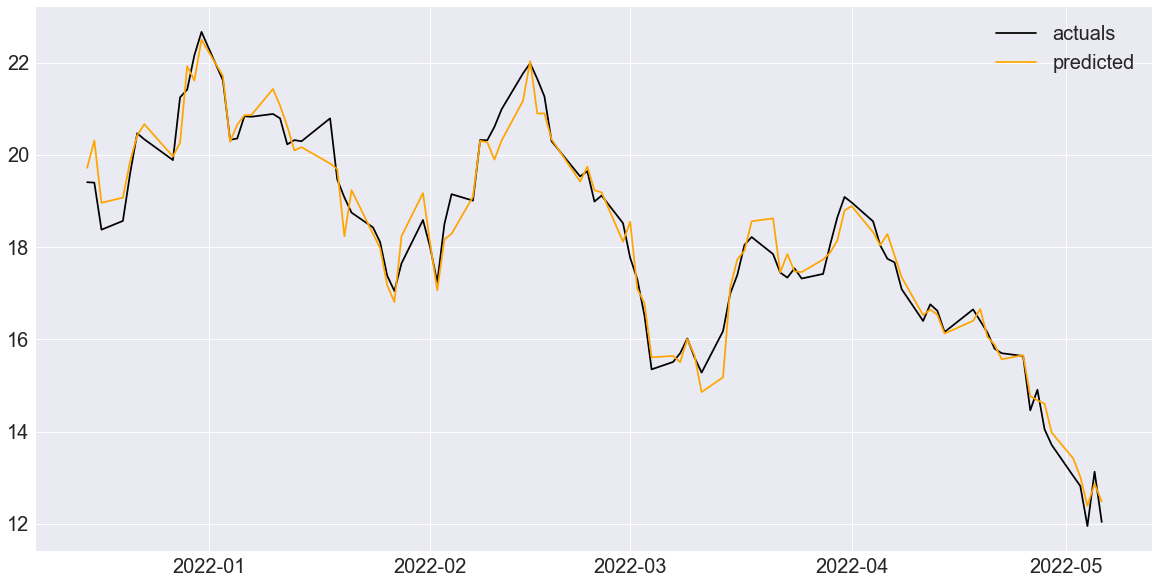

In [68]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test1['gtbif_next_close'], color='black')
ax.plot(y_test1['gtbif_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## GTBIF, Cannabis ETFs, and DJIX

In [69]:
df_etfs_dow = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_etfs_dow.csv')
df_etfs_dow['Date'] = pd.to_datetime(df_etfs_dow['Date'])
df_etfs_dow = df_etfs_dow.set_index('Date')

In [70]:
df2 = pd.merge(df_gtbif, df_etfs_dow, on='Date', how='left')
df2

gtbif_Open  gtbif_High  gtbif_Low  gtbif_Close  gtbif_Volume  \
Date                                                                       
2018-06-14       7.352       7.557      7.140        7.376         90300   
2018-06-15       7.537       7.973      7.293        7.973         71700   
2018-06-18       8.346       9.395      8.029        9.395        147600   
2018-06-19       9.765      10.920      9.529        9.729        137300   
2018-06-20      10.461      10.461      9.958       10.040         57500   
...                ...         ...        ...          ...           ...   
2022-05-03      13.500      13.790     12.900       13.040        318400   
2022-05-04      13.190      13.210     12.640       12.820        573000   
2022-05-05      13.050      13.050     11.728       11.950        935700   
2022-05-06      12.090      13.140     11.520       13.130        630500   
2022-05-09      12.990      12.990     11.950       12.040        559800   

            gtbif_prev_close  gtbif_next_close  gtbif_diff  gtbif_%change  \
Date                                                                        
2018-06-14               NaN             7.973         NaN            NaN   
2018-06-15             7.376             9.395       0.597       0.080938   
2018-06-18             7.973             9.729       1.422       0.178352   
2018-06-19             9.395            10.040       0.334       0.035551   
2018-06-20             9.729            10.140       0.311       0.031966   
...                      ...               ...         ...            ...   
2022-05-03            13.710            12.820      -0.670      -0.048869   
2022-05-04            13.040            11.950      -0.220      -0.016871   
2022-05-05            12.820            13.130      -0.870      -0.067863   
2022-05-06            11.950            12.040       1.180       0.098745   
2022-05-09            13.130               NaN      -1.090      -0.083016   

            gtbif_5day_avg_close  gtbif_5day_avg_diff  gtbif_10day_avg_close  \
Date                                                                           
2018-06-14                   NaN                  NaN                    NaN   
2018-06-15                   NaN                  NaN                    NaN   
2018-06-18                   NaN                  NaN                    NaN   
2018-06-19                   NaN                  NaN                    NaN   
2018-06-20                8.9026                  NaN                    NaN   
...                          ...                  ...                    ...   
2022-05-03               14.0334              -0.5200                14.9857   
2022-05-04               13.7054              -0.3280                14.6277   
2022-05-05               13.1140              -0.5914                14.2077   
2022-05-06               12.9300              -0.1840                13.9407   
2022-05-09               12.5960              -0.3340                13.5747   

            gtbif_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                           
2018-06-14                   NaN  30.379999  30.580000  30.051001  30.209999   
2018-06-15                   NaN  30.010000  30.330000  29.700001  29.990000   
2018-06-18                   NaN  29.950001  30.139999  29.761999  30.059999   
2018-06-19                   NaN  29.920000  30.389999  29.830000  30.209999   
2018-06-20                   NaN  31.000000  31.000000  30.318001  30.920000   
...                          ...        ...        ...        ...        ...   
2022-05-03                -0.361   8.340000   8.470000   8.240000   8.320000   
2022-05-04                -0.358   8.340000   8.590000   8.100000   8.590000   
2022-05-05                -0.420   8.500000   8.508000   8.010000   8.050000   
2022-05-06                -0.267   8.010000   8.050000   7.750000   7.900000   
2022-05-09          

In [71]:
df_isna2 = df2.isna()
df_isna2

gtbif_Open  gtbif_High  gtbif_Low  gtbif_Close  gtbif_Volume  \
Date                                                                       
2018-06-14       False       False      False        False         False   
2018-06-15       False       False      False        False         False   
2018-06-18       False       False      False        False         False   
2018-06-19       False       False      False        False         False   
2018-06-20       False       False      False        False         False   
...                ...         ...        ...          ...           ...   
2022-05-03       False       False      False        False         False   
2022-05-04       False       False      False        False         False   
2022-05-05       False       False      False        False         False   
2022-05-06       False       False      False        False         False   
2022-05-09       False       False      False        False         False   

            gtbif_prev_close  gtbif_next_close  gtbif_diff  gtbif_%change  \
Date                                                                        
2018-06-14              True             False        True           True   
2018-06-15             False             False       False          False   
2018-06-18             False             False       False          False   
2018-06-19             False             False       False          False   
2018-06-20             False             False       False          False   
...                      ...               ...         ...            ...   
2022-05-03             False             False       False          False   
2022-05-04             False             False       False          False   
2022-05-05             False             False       False          False   
2022-05-06             False             False       False          False   
2022-05-09             False              True       False          False   

            gtbif_5day_avg_close  gtbif_5day_avg_diff  gtbif_10day_avg_close  \
Date                                                                           
2018-06-14                  True                 True                   True   
2018-06-15                  True                 True                   True   
2018-06-18                  True                 True                   True   
2018-06-19                  True                 True                   True   
2018-06-20                 False                 True                   True   
...                          ...                  ...                    ...   
2022-05-03                 False                False                  False   
2022-05-04                 False                False                  False   
2022-05-05                 False                False                  False   
2022-05-06                 False                False                  False   
2022-05-09                 False                False                  False   

            gtbif_10day_avg_diff  mj_Open  mj_High  mj_Low  mj_Close  \
Date                                                                   
2018-06-14                  True    False    False   False     False   
2018-06-15                  True    False    False   False     False   
2018-06-18                  True    False    False   False     False   
2018-06-19                  True    False    False   False     False   
2018-06-20                  True    False    False   False     False   
...                          ...      ...      ...     ...       ...   
2022-05-03                 False    False    False   False     False   
2022-05-04                 False    False    False   False     False   
2022-05-05                 False    False    False   False     False   
2022-05-06                 False    False    False   False     False   
2022-05-09                 False    False    False   False     False   

            mj_Volume  mj_prev_close  mj_ne

In [72]:
df_isna2 = df_isna2.add_suffix('_b')

In [73]:
df2 = df2.fillna(0)
df2.head()

gtbif_Open  gtbif_High  gtbif_Low  gtbif_Close  gtbif_Volume  \
Date                                                                       
2018-06-14       7.352       7.557      7.140        7.376         90300   
2018-06-15       7.537       7.973      7.293        7.973         71700   
2018-06-18       8.346       9.395      8.029        9.395        147600   
2018-06-19       9.765      10.920      9.529        9.729        137300   
2018-06-20      10.461      10.461      9.958       10.040         57500   

            gtbif_prev_close  gtbif_next_close  gtbif_diff  gtbif_%change  \
Date                                                                        
2018-06-14             0.000             7.973       0.000       0.000000   
2018-06-15             7.376             9.395       0.597       0.080938   
2018-06-18             7.973             9.729       1.422       0.178352   
2018-06-19             9.395            10.040       0.334       0.035551   
2018-06-20             9.729            10.140       0.311       0.031966   

            gtbif_5day_avg_close  gtbif_5day_avg_diff  gtbif_10day_avg_close  \
Date                                                                           
2018-06-14                0.0000                  0.0                    0.0   
2018-06-15                0.0000                  0.0                    0.0   
2018-06-18                0.0000                  0.0                    0.0   
2018-06-19                0.0000                  0.0                    0.0   
2018-06-20                8.9026                  0.0                    0.0   

            gtbif_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                           
2018-06-14                   0.0  30.379999  30.580000  30.051001  30.209999   
2018-06-15                   0.0  30.010000  30.330000  29.700001  29.990000   
2018-06-18                   0.0  29.950001  30.139999  29.761999  30.059999   
2018-06-19                   0.0  29.920000  30.389999  29.830000  30.209999   
2018-06-20                   0.0  31.000000  31.000000  30.318001  30.920000   

            mj_Volume  mj_prev_close  mj_next_close   mj_diff  mj_%change  \
Date                                                                        
2018-06-14     195500      30.299999      29.990000 -0.090000   -0.002970   
2018-06-15     167900      30.209999      30.059999 -0.219999   -0.007282   
2018-06-18      79500      29.990000      30.209999  0.069999    0.002334   
2018-06-19     147400      30.059999      30.920000  0.150000    0.004990   
2018-06-20     262700      30.209999      31.719999  0.710001    0.023502   

            mj_5day_avg_close  mj_5day_avg_diff  mj_10day_avg_close  \
Date                                                                  
2018-06-14          30.697999            -0.312           30.832999   
2018-06-15          30.395999            -0.302           30.877000   
2018-06-18          30.197999            -0.198           30.868000   
2018-06-19          30.153999            -0.044           30.777999   
2018-06-20          30.277999             0.124           30.643999   

            mj_10day_avg_diff  msos_Open  msos_High  msos_Low  msos_Close  \
Date                                                                        
2018-06-14              0.040        0.0        0.0       0.0         0.0   
2018-06-15              0.044        0.0        0.0       0.0         0.0   
2018-06-18             -0.009        0.0        0.0       0.0         0.0   
2018-06-19             -0.090        0.0        0.0       0.0         0.0   
2018-06-20             -0.134        0.0        0.0       0.0         0.0   

            msos_Volume  msos_prev_close  msos_next_close  msos_diff  \
Date                                                                   
2018-06-14          0.0              0.0              0.0        0.0   
2018-06-15          0.0

In [74]:
df2 = pd.concat([df2, df_isna2], axis=1)
df2

gtbif_Open  gtbif_High  gtbif_Low  gtbif_Close  gtbif_Volume  \
Date                                                                       
2018-06-14       7.352       7.557      7.140        7.376         90300   
2018-06-15       7.537       7.973      7.293        7.973         71700   
2018-06-18       8.346       9.395      8.029        9.395        147600   
2018-06-19       9.765      10.920      9.529        9.729        137300   
2018-06-20      10.461      10.461      9.958       10.040         57500   
...                ...         ...        ...          ...           ...   
2022-05-03      13.500      13.790     12.900       13.040        318400   
2022-05-04      13.190      13.210     12.640       12.820        573000   
2022-05-05      13.050      13.050     11.728       11.950        935700   
2022-05-06      12.090      13.140     11.520       13.130        630500   
2022-05-09      12.990      12.990     11.950       12.040        559800   

            gtbif_prev_close  gtbif_next_close  gtbif_diff  gtbif_%change  \
Date                                                                        
2018-06-14             0.000             7.973       0.000       0.000000   
2018-06-15             7.376             9.395       0.597       0.080938   
2018-06-18             7.973             9.729       1.422       0.178352   
2018-06-19             9.395            10.040       0.334       0.035551   
2018-06-20             9.729            10.140       0.311       0.031966   
...                      ...               ...         ...            ...   
2022-05-03            13.710            12.820      -0.670      -0.048869   
2022-05-04            13.040            11.950      -0.220      -0.016871   
2022-05-05            12.820            13.130      -0.870      -0.067863   
2022-05-06            11.950            12.040       1.180       0.098745   
2022-05-09            13.130             0.000      -1.090      -0.083016   

            gtbif_5day_avg_close  gtbif_5day_avg_diff  gtbif_10day_avg_close  \
Date                                                                           
2018-06-14                0.0000               0.0000                 0.0000   
2018-06-15                0.0000               0.0000                 0.0000   
2018-06-18                0.0000               0.0000                 0.0000   
2018-06-19                0.0000               0.0000                 0.0000   
2018-06-20                8.9026               0.0000                 0.0000   
...                          ...                  ...                    ...   
2022-05-03               14.0334              -0.5200                14.9857   
2022-05-04               13.7054              -0.3280                14.6277   
2022-05-05               13.1140              -0.5914                14.2077   
2022-05-06               12.9300              -0.1840                13.9407   
2022-05-09               12.5960              -0.3340                13.5747   

            gtbif_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                           
2018-06-14                 0.000  30.379999  30.580000  30.051001  30.209999   
2018-06-15                 0.000  30.010000  30.330000  29.700001  29.990000   
2018-06-18                 0.000  29.950001  30.139999  29.761999  30.059999   
2018-06-19                 0.000  29.920000  30.389999  29.830000  30.209999   
2018-06-20                 0.000  31.000000  31.000000  30.318001  30.920000   
...                          ...        ...        ...        ...        ...   
2022-05-03                -0.361   8.340000   8.470000   8.240000   8.320000   
2022-05-04                -0.358   8.340000   8.590000   8.100000   8.590000   
2022-05-05                -0.420   8.500000   8.508000   8.010000   8.050000   
2022-05-06                -0.267   8.010000   8.050000   7.750000   7.900000   
2022-05-09          

In [75]:
df2['month'] = df2.index.month
df2['day'] = df2.index.day
df2['year'] = df2.index.year
df2['quarter'] = (df2['month']-1)//3 + 1

In [76]:
cols = df2.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'gtbif_Open']

In [77]:
df2 = df2[cols].copy()
df2

month  day  year  quarter  gtbif_Open  gtbif_High  gtbif_Low  \
Date                                                                       
2018-06-14      6   14  2018        2       7.352       7.557      7.140   
2018-06-15      6   15  2018        2       7.537       7.973      7.293   
2018-06-18      6   18  2018        2       8.346       9.395      8.029   
2018-06-19      6   19  2018        2       9.765      10.920      9.529   
2018-06-20      6   20  2018        2      10.461      10.461      9.958   
...           ...  ...   ...      ...         ...         ...        ...   
2022-05-03      5    3  2022        2      13.500      13.790     12.900   
2022-05-04      5    4  2022        2      13.190      13.210     12.640   
2022-05-05      5    5  2022        2      13.050      13.050     11.728   
2022-05-06      5    6  2022        2      12.090      13.140     11.520   
2022-05-09      5    9  2022        2      12.990      12.990     11.950   

            gtbif_Close  gtbif_Volume  gtbif_prev_close  gtbif_next_close  \
Date                                                                        
2018-06-14        7.376         90300             0.000             7.973   
2018-06-15        7.973         71700             7.376             9.395   
2018-06-18        9.395        147600             7.973             9.729   
2018-06-19        9.729        137300             9.395            10.040   
2018-06-20       10.040         57500             9.729            10.140   
...                 ...           ...               ...               ...   
2022-05-03       13.040        318400            13.710            12.820   
2022-05-04       12.820        573000            13.040            11.950   
2022-05-05       11.950        935700            12.820            13.130   
2022-05-06       13.130        630500            11.950            12.040   
2022-05-09       12.040        559800            13.130             0.000   

            gtbif_diff  gtbif_%change  gtbif_5day_avg_close  \
Date                                                          
2018-06-14       0.000       0.000000                0.0000   
2018-06-15       0.597       0.080938                0.0000   
2018-06-18       1.422       0.178352                0.0000   
2018-06-19       0.334       0.035551                0.0000   
2018-06-20       0.311       0.031966                8.9026   
...                ...            ...                   ...   
2022-05-03      -0.670      -0.048869               14.0334   
2022-05-04      -0.220      -0.016871               13.7054   
2022-05-05      -0.870      -0.067863               13.1140   
2022-05-06       1.180       0.098745               12.9300   
2022-05-09      -1.090      -0.083016               12.5960   

            gtbif_5day_avg_diff  gtbif_10day_avg_close  gtbif_10day_avg_diff  \
Date                                                                           
2018-06-14               0.0000                 0.0000                 0.000   
2018-06-15               0.0000                 0.0000                 0.000   
2018-06-18               0.0000                 0.0000                 0.000   
2018-06-19               0.0000                 0.0000                 0.000   
2018-06-20               0.0000                 0.0000                 0.000   
...                         ...                    ...                   ...   
2022-05-03              -0.5200                14.9857                -0.361   
2022-05-04              -0.3280                14.6277                -0.358   
2022-05-05              -0.5914                14.2077                -0.420   
2022-05-06              -0.1840                13.9407                -0.267   
2022-05-09              -0.3340                13.5747                -0.366   

              mj_Open    mj_High     mj_Low   mj_Close  mj_Volume  \
Date                                                                
2018-06-14  30.379999 

In [78]:
df2.drop(df2.tail(1).index, inplace=True)

In [79]:
n = int(len(df2) * 0.9)
n

883

In [80]:
train2 = df2[:n]
test2 = df2[n:]

In [81]:
print(len(train2))
print(len(test2))

883
99


In [82]:
X_train2 = train2.drop('gtbif_next_close', axis=1)
X_train2.head(3)

month  day  year  quarter  gtbif_Open  gtbif_High  gtbif_Low  \
Date                                                                       
2018-06-14      6   14  2018        2       7.352       7.557      7.140   
2018-06-15      6   15  2018        2       7.537       7.973      7.293   
2018-06-18      6   18  2018        2       8.346       9.395      8.029   

            gtbif_Close  gtbif_Volume  gtbif_prev_close  gtbif_diff  \
Date                                                                  
2018-06-14        7.376         90300             0.000       0.000   
2018-06-15        7.973         71700             7.376       0.597   
2018-06-18        9.395        147600             7.973       1.422   

            gtbif_%change  gtbif_5day_avg_close  gtbif_5day_avg_diff  \
Date                                                                   
2018-06-14       0.000000                   0.0                  0.0   
2018-06-15       0.080938                   0.0                  0.0   
2018-06-18       0.178352                   0.0                  0.0   

            gtbif_10day_avg_close  gtbif_10day_avg_diff    mj_Open    mj_High  \
Date                                                                            
2018-06-14                    0.0                   0.0  30.379999  30.580000   
2018-06-15                    0.0                   0.0  30.010000  30.330000   
2018-06-18                    0.0                   0.0  29.950001  30.139999   

               mj_Low   mj_Close  mj_Volume  mj_prev_close  mj_next_close  \
Date                                                                        
2018-06-14  30.051001  30.209999     195500      30.299999      29.990000   
2018-06-15  29.700001  29.990000     167900      30.209999      30.059999   
2018-06-18  29.761999  30.059999      79500      29.990000      30.209999   

             mj_diff  mj_%change  mj_5day_avg_close  mj_5day_avg_diff  \
Date                                                                    
2018-06-14 -0.090000   -0.002970          30.697999            -0.312   
2018-06-15 -0.219999   -0.007282          30.395999            -0.302   
2018-06-18  0.069999    0.002334          30.197999            -0.198   

            mj_10day_avg_close  mj_10day_avg_diff  msos_Open  msos_High  \
Date                                                                      
2018-06-14           30.832999              0.040        0.0        0.0   
2018-06-15           30.877000              0.044        0.0        0.0   
2018-06-18           30.868000             -0.009        0.0        0.0   

            msos_Low  msos_Close  msos_Volume  msos_prev_close  \
Date                                                             
2018-06-14       0.0         0.0          0.0              0.0   
2018-06-15       0.0         0.0          0.0              0.0   
2018-06-18       0.0         0.0          0.0              0.0   

            msos_next_close  msos_diff  msos_%change  msos_5day_avg_close  \
Date                                                                        
2018-06-14              0.0        0.0           0.0                  0.0   
2018-06-15              0.0        0.0           0.0                  0.0   
2018-06-18              0.0        0.0           0.0                  0.0   

            msos_5day_avg_diff  msos_10day_avg_close  msos_10day_avg_diff  \
Date                                                                        
2018-06-14                 0.0                   0.0                  0.0   
2018-06-15                 0.0                   0.0                  0.0   
2018-06-18                 0.0                   0.0                  0.0   

            yolo_Open  yolo_High  yolo_Low  yolo_Close  yolo_Volume  \
Date                                                                  
2018-06-14        0.0        0.0       0.0         0.0          0.0   
2018-06-15        0.0        0.0       0.0         0.0          

In [83]:
X_train2.shape

(883, 185)

In [84]:
y_train2 = train2['gtbif_next_close']
y_train2.head(3)

Date
2018-06-14    7.973
2018-06-15    9.395
2018-06-18    9.729
Name: gtbif_next_close, dtype: float64

In [85]:
y_train2.tail(3)

Date
2021-12-10    20.754999
2021-12-13    19.980000
2021-12-14    19.780001
Name: gtbif_next_close, dtype: float64

In [86]:
X_test2 = test2.drop('gtbif_next_close', axis=1)
y_test2 = test2['gtbif_next_close']

In [87]:
X_test2.head(3)

month  day  year  quarter  gtbif_Open  gtbif_High  gtbif_Low  \
Date                                                                       
2021-12-15     12   15  2021        4       19.15   20.350000  19.090000   
2021-12-16     12   16  2021        4       20.76   20.780001  19.110001   
2021-12-17     12   17  2021        4       19.18   19.770000  18.799999   

            gtbif_Close  gtbif_Volume  gtbif_prev_close  gtbif_diff  \
Date                                                                  
2021-12-15    19.780001        450800         19.980000   -0.199999   
2021-12-16    19.410000       3795400         19.780001   -0.370001   
2021-12-17    19.400000        625600         19.410000   -0.010000   

            gtbif_%change  gtbif_5day_avg_close  gtbif_5day_avg_diff  \
Date                                                                   
2021-12-15      -0.010010                20.873              -0.3484   
2021-12-16      -0.018706                20.385              -0.4880   
2021-12-17      -0.000515                19.865              -0.5200   

            gtbif_10day_avg_close  gtbif_10day_avg_diff  mj_Open  mj_High  \
Date                                                                        
2021-12-15                20.5797                -0.004    11.17   11.395   
2021-12-16                20.4317                -0.148    11.36   11.560   
2021-12-17                20.3077                -0.124    11.05   11.525   

            mj_Low  mj_Close  mj_Volume  mj_prev_close  mj_next_close  \
Date                                                                    
2021-12-15  10.890     11.30    1361500          11.20          11.22   
2021-12-16  11.090     11.22    1031900          11.30          11.48   
2021-12-17  10.945     11.48    1342700          11.22          11.08   

            mj_diff  mj_%change  mj_5day_avg_close  mj_5day_avg_diff  \
Date                                                                   
2021-12-15     0.10    0.008929             11.442            -0.178   
2021-12-16    -0.08   -0.007080             11.344            -0.098   
2021-12-17     0.26    0.023173             11.350             0.006   

            mj_10day_avg_close  mj_10day_avg_diff  msos_Open  msos_High  \
Date                                                                      
2021-12-15              11.590             -0.015      24.50  24.629999   
2021-12-16              11.541             -0.049      24.59  24.820000   
2021-12-17              11.556              0.015      23.75  24.400000   

             msos_Low  msos_Close  msos_Volume  msos_prev_close  \
Date                                                              
2021-12-15  23.590000   24.530001    1694800.0        24.420000   
2021-12-16  23.700001   24.110001    1362800.0        24.530001   
2021-12-17  23.480000   24.100000    1444300.0        24.110001   

            msos_next_close  msos_diff  msos_%change  msos_5day_avg_close  \
Date                                                                        
2021-12-15        24.110001   0.110001      0.004505               25.248   
2021-12-16        24.100000  -0.420000     -0.017122               24.800   
2021-12-17        23.270000  -0.010001     -0.000415               24.408   

            msos_5day_avg_diff  msos_10day_avg_close  msos_10day_avg_diff  \
Date                                                                        
2021-12-15              -0.454                25.627               -0.097   
2021-12-16              -0.448                25.392               -0.235   
2021-12-17              -0.392                25.153               -0.239   

            yolo_Open  yolo_High  yolo_Low  yolo_Close  yolo_Volume  \
Date                                                                  
2021-12-15      12.95     13.225     12.60       13.20     173800.0   
2021-12-16      13.20     13.370     12.76       12.96     131900.0   
2021-12-17      12.71     13.238 

In [88]:
X_test2.shape

(99, 185)

In [89]:
y_test2.tail(3)

Date
2022-05-04    11.95
2022-05-05    13.13
2022-05-06    12.04
Name: gtbif_next_close, dtype: float64

In [90]:
model2 = LinearRegression()
model2.fit(X_train2, y_train2)
y_pred2 = model2.predict(X_test2)

In [91]:
y_pred2[:5]

array([19.53416696, 20.32006169, 18.83512535, 19.0674878 , 19.93906669])

In [92]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man2 = rmse_manual(y_test2, y_pred2)
print(rmse_man2)

0.3901031701147592


In [93]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man2 = mae_manual(y_test2, y_pred2)
print(mae_man2)

0.29965543138960177


In [94]:
hyper_table.append(dict(version='1+ETFs+Dow',
                        model=model2, 
                        rmse=rmse_man2,
                        mae=mae_man2,
                        rows=df2.shape[0], 
                        train_rows=X_train2.shape[0],
                        test_rows=X_test2.shape[0],
                        columns=df2.shape[1]))

In [95]:
y_train2 = pd.DataFrame(y_train2, columns=['gtbif_next_close'])
y_test2 = pd.DataFrame(y_test2, columns=['gtbif_next_close'])

In [96]:
y_test2['gtbif_pred_next_close'] = y_pred2

In [97]:
y_test2.tail()

gtbif_next_close  gtbif_pred_next_close
Date                                               
2022-05-02             13.04              13.379536
2022-05-03             12.82              13.156560
2022-05-04             11.95              12.200223
2022-05-05             13.13              12.792697
2022-05-06             12.04              12.327680

In [98]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test2['gtbif_next_close'], color='black')
ax.plot(y_test2['gtbif_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## 10 Cannabis stocks (GTBIF target)

In [99]:
df_all = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_all.csv')
df_all['Date'] = pd.to_datetime(df_all['Date'])
df_all = df_all.set_index('Date')

In [100]:
df_isna3 = df_all.isna()
df_isna3

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     False     False    False      False       False   
2014-04-08     False     False    False      False       False   
2014-04-09     False     False    False      False       False   
2014-04-10     False     False    False      False       False   
2014-04-11     False     False    False      False       False   
...              ...       ...      ...        ...         ...   
2022-05-03     False     False    False      False       False   
2022-05-04     False     False    False      False       False   
2022-05-05     False     False    False      False       False   
2022-05-06     False     False    False      False       False   
2022-05-09     False     False    False      False       False   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07            True           False      True         True   
2014-04-08           False           False     False        False   
2014-04-09           False           False     False        False   
2014-04-10           False           False     False        False   
2014-04-11           False           False     False        False   
...                    ...             ...       ...          ...   
2022-05-03           False           False     False        False   
2022-05-04           False           False     False        False   
2022-05-05           False           False     False        False   
2022-05-06           False           False     False        False   
2022-05-09           False            True     False        False   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                True               True                 True   
2014-04-08                True               True                 True   
2014-04-09                True               True                 True   
2014-04-10                True               True                 True   
2014-04-11               False               True                 True   
...                        ...                ...                  ...   
2022-05-03               False              False                False   
2022-05-04               False              False                False   
2022-05-05               False              False                False   
2022-05-06               False              False                False   
2022-05-09               False              False                False   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                True        True        True       True   
2014-04-08                True        True        True       True   
2014-04-09                True        True        True       True   
2014-04-10                True        True        True       True   
2014-04-11                True        True        True       True   
...                        ...         ...         ...        ...   
2022-05-03               False       False       False      False   
2022-05-04               False       False       False      False   
2022-05-05               False       False       False      False   
2022-05-06               False       False       False      False   
2022-05-09               False       False       False      False   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         True          True              True              True   
2014-04-08         True          True              True              True   
2014-04-09         True          True              True              True   
2014-04-1

In [101]:
df_isna3 = df_isna3.add_suffix('_b')

In [102]:
df3 = df_all.fillna(0)
df3.head()

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000                0.0                  0.0   
2014-04-08              0.0000                0.0                  0.0   
2014-04-09              0.0000                0.0                  0.0   
2014-04-10              0.0000                0.0                  0.0   
2014-04-11              3.3196                0.0                  0.0   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                 0.0         0.0         0.0        0.0   
2014-04-08                 0.0         0.0         0.0        0.0   
2014-04-09                 0.0         0.0         0.0        0.0   
2014-04-10                 0.0         0.0         0.0        0.0   
2014-04-11                 0.0         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07          0.0           0.0               0.0               0.0   
2014-04-08          0.0           0.0               0.0               0.0   
2014-04-09          0.0           0.0               0.0               0.0   
2014-04-10          0.0           0.0               0.0               0.0   
2014-04-11          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2014-04-07         0.0            0.0                   0.0   
2014-04-08         0.0            0.0                   0.0   
2014-04-09         0.0            0.0                   0.0   
2014-04-10         0.0            0.0                   0.0   
2014-04-11         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2014-04-07                  0.0                    0.0                   0.0   
2014-04-08                  0.0                    0.0                   0.0   
2014-04-09                  0.0                    0.0                   0.0   
2014-04-10                  0.0                    0.0                   0.0   
2014-04-11                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2014-04-07        0.0        0.0       0.0         0.0          0.0   
2014-04-08        0.0        0.0       0.0         0.0          0.0   
2014-04-09        0.0        0.0       0.0         0.0          0.0   
2014-04-10        0.0        0.0       0.0         0.0          0.0   
2014-04-11        0.0        0.0       0.0         0.0          0.0   

            cron_prev

In [103]:
df3 = pd.concat([df3, df_isna3], axis=1)
df3

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   
...              ...       ...      ...        ...         ...   
2022-05-03     6.000     6.270    5.945      6.060     5017600   
2022-05-04     6.050     6.710    5.850      6.670     7851100   
2022-05-05     6.470     6.590    6.010      6.070     5520300   
2022-05-06     6.010     6.140    5.758      5.970     3971100   
2022-05-09     5.720     5.875    5.550      5.550     4207600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   
...                    ...             ...       ...          ...   
2022-05-03           6.050           6.670     0.010     0.001653   
2022-05-04           6.060           6.070     0.610     0.100660   
2022-05-05           6.670           5.970    -0.600    -0.089955   
2022-05-06           6.070           5.550    -0.100    -0.016474   
2022-05-09           5.970           0.000    -0.420    -0.070352   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-03              5.7000              0.152                5.642   
2022-05-04              5.9880              0.288                5.736   
2022-05-05              6.1120              0.124                5.768   
2022-05-06              6.1640              0.052                5.808   
2022-05-09              6.0640             -0.100                5.806   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000        0.00       0.000       0.00   
2014-04-08               0.000        0.00       0.000       0.00   
2014-04-09               0.000        0.00       0.000       0.00   
2014-04-10               0.000        0.00       0.000       0.00   
2014-04-11               0.000        0.00       0.000       0.00   
...                        ...         ...         ...        ...   
2022-05-03               0.013        4.50       4.750       4.20   
2022-05-04               0.094        4.22       4.414       4.05   
2022-05-05               0.032        4.20       4.250       4.02   
2022-05-06               0.040        3.92       4.340       3.82   
2022-05-09              -0.002        4.30       4.300       3.98   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07        0.000           0.0             0.000             0.000   
2014-04-08        0.000           0.0             0.000             0.000   
2014-04-09        0.000           0.0             0.000             0.000   
2014-04-1

In [104]:
df3['month'] = df3.index.month
df3['day'] = df3.index.day
df3['year'] = df3.index.year
df3['quarter'] = (df3['month']-1)//3 + 1

In [105]:
cols = df3.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'cgc_Open']

In [106]:
df3 = df3[cols].copy()
df3

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   
2014-04-10      4   10  2014        2     3.346     3.494    3.029      3.285   
2014-04-11      4   11  2014        2     3.204     3.293    3.045      3.085   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-03      5    3  2022        2     6.000     6.270    5.945      6.060   
2022-05-04      5    4  2022        2     6.050     6.710    5.850      6.670   
2022-05-05      5    5  2022        2     6.470     6.590    6.010      6.070   
2022-05-06      5    6  2022        2     6.010     6.140    5.758      5.970   
2022-05-09      5    9  2022        2     5.720     5.875    5.550      5.550   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2014-04-07      168600           0.000           3.629     0.000     0.000000   
2014-04-08      136800           3.300           3.299     0.329     0.099697   
2014-04-09       75200           3.629           3.285    -0.330    -0.090934   
2014-04-10      206100           3.299           3.085    -0.014    -0.004244   
2014-04-11      114600           3.285           2.668    -0.200    -0.060883   
...                ...             ...             ...       ...          ...   
2022-05-03     5017600           6.050           6.670     0.010     0.001653   
2022-05-04     7851100           6.060           6.070     0.610     0.100660   
2022-05-05     5520300           6.670           5.970    -0.600    -0.089955   
2022-05-06     3971100           6.070           5.550    -0.100    -0.016474   
2022-05-09     4207600           5.970           0.000    -0.420    -0.070352   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-03              5.7000              0.152                5.642   
2022-05-04              5.9880              0.288                5.736   
2022-05-05              6.1120              0.124                5.768   
2022-05-06              6.1640              0.052                5.808   
2022-05-09              6.0640             -0.100                5.806   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000        0.00       0.000       0.00   
2014-04-08               0.000        0.00       0.000       0.00   
2014-04-09               0.000        0.00       0.000       0.00   
2014-04-10               0.000        0.00       0.000       0.00   
2014-04-11               0.000        0.00       0.000       0.00   
...                        ...         ...         ...        ...   
2022-05-03               0.013        4.50       4.750       4.20   
2022-05-04               0.094        4.22       4.414       4.05   
2022-05-05               0.032        4.20       4.250       4.02   
2022-05-06               0.040        3.92       4.340       3.82   
2022-05-09              -0.002        4.30       4.300       3.98   

            crlbf_Close  crlbf_Volume  crlb

In [107]:
df3 = df3[cut:].copy()
df3

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2018-06-14      6   14  2018        2  30.030001  30.559999  29.400000   
2018-06-15      6   15  2018        2  29.590000  29.950001  29.190001   
2018-06-18      6   18  2018        2  29.770000  30.941999  29.549999   
2018-06-19      6   19  2018        2  30.400000  32.880001  30.299999   
2018-06-20      6   20  2018        2  33.709999  34.139999  31.420000   
...           ...  ...   ...      ...        ...        ...        ...   
2022-05-03      5    3  2022        2   6.000000   6.270000   5.945000   
2022-05-04      5    4  2022        2   6.050000   6.710000   5.850000   
2022-05-05      5    5  2022        2   6.470000   6.590000   6.010000   
2022-05-06      5    6  2022        2   6.010000   6.140000   5.758000   
2022-05-09      5    9  2022        2   5.720000   5.875000   5.550000   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2018-06-14  29.490000     2417900       30.740000       29.870001 -1.250000   
2018-06-15  29.870001     1314100       29.490000       30.830000  0.380001   
2018-06-18  30.830000     1468100       29.870001       32.049999  0.959999   
2018-06-19  32.049999     4519000       30.830000       34.099998  1.219999   
2018-06-20  34.099998     7147600       32.049999       35.959999  2.049999   
...               ...         ...             ...             ...       ...   
2022-05-03   6.060000     5017600        6.050000        6.670000  0.010000   
2022-05-04   6.670000     7851100        6.060000        6.070000  0.610000   
2022-05-05   6.070000     5520300        6.670000        5.970000 -0.600000   
2022-05-06   5.970000     3971100        6.070000        5.550000 -0.100000   
2022-05-09   5.550000     4207600        5.970000        0.000000 -0.420000   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2018-06-14    -0.040664              29.974             -0.156   
2018-06-15     0.012886              29.850             -0.124   
2018-06-18     0.032139              30.106              0.256   
2018-06-19     0.039572              30.596              0.490   
2018-06-20     0.063963              31.268              0.672   
...                 ...                 ...                ...   
2022-05-03     0.001653               5.700              0.152   
2022-05-04     0.100660               5.988              0.288   
2022-05-05    -0.089955               6.112              0.124   
2022-05-06    -0.016474               6.164              0.052   
2022-05-09    -0.070352               6.064             -0.100   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2018-06-14               30.193               0.112        0.00       0.000   
2018-06-15               30.268               0.075        0.00       0.000   
2018-06-18               30.286               0.018        0.00       0.000   
2018-06-19               30.432               0.146        0.00       0.000   
2018-06-20               30.699               0.267        0.00       0.000   
...                         ...                 ...         ...         ...   
2022-05-03                5.642               0.013        4.50       4.750   
2022-05-04                5.736               0.094        4.22       4.414   
2022-05-05                5.768               0.032        4.20       4.250   
2022-05-06                5.808               0.040        3.92       4.340   
2022-05-09                5.806              -0.002        4.30       4.300   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                            

In [108]:
df3.drop(df3.tail(1).index, inplace=True)

In [109]:
n = int(len(df3) * 0.9)
n

883

In [110]:
train3 = df3[:n]
test3 = df3[n:]

In [111]:
print(len(train3))
print(len(test3))

883
99


In [112]:
X_train3 = train3.drop('gtbif_next_close', axis=1)
X_train3.head(3)

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2018-06-14      6   14  2018        2  30.030001  30.559999  29.400000   
2018-06-15      6   15  2018        2  29.590000  29.950001  29.190001   
2018-06-18      6   18  2018        2  29.770000  30.941999  29.549999   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2018-06-14  29.490000     2417900       30.740000       29.870001 -1.250000   
2018-06-15  29.870001     1314100       29.490000       30.830000  0.380001   
2018-06-18  30.830000     1468100       29.870001       32.049999  0.959999   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2018-06-14    -0.040664              29.974             -0.156   
2018-06-15     0.012886              29.850             -0.124   
2018-06-18     0.032139              30.106              0.256   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2018-06-14               30.193               0.112         0.0         0.0   
2018-06-15               30.268               0.075         0.0         0.0   
2018-06-18               30.286               0.018         0.0         0.0   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                                 
2018-06-14        0.0          0.0           0.0               0.0   
2018-06-15        0.0          0.0           0.0               0.0   
2018-06-18        0.0          0.0           0.0               0.0   

            crlbf_next_close  crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                                            
2018-06-14               0.0         0.0            0.0                   0.0   
2018-06-15               0.0         0.0            0.0                   0.0   
2018-06-18               0.0         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2018-06-14                  0.0                    0.0                   0.0   
2018-06-15                  0.0                    0.0                   0.0   
2018-06-18                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2018-06-14       7.07      7.290     6.870        6.93    3424800.0   
2018-06-15       6.84      7.049     6.805        7.02    2307700.0   
2018-06-18       6.98      6.980     6.700        6.78    2722200.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2018-06-14             7.12             7.02      -0.19     -0.026685   
2018-06-15             6.93             6.78       0.09      0.012987   
2018-06-18             7.02             6.86      -0.24     -0.034188   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2018-06-14                7.002              -0.146                 7.143   
2018-06-15                6.960              -0.042                 7.161   
2018-06-18                6.924              -0.036                 7.139   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2018-06-14                0.069         0.0         0.0        0.0   
2018-06-15                0.018         0.

In [113]:
X_train3.shape

(883, 263)

In [114]:
y_train3 = train3['gtbif_next_close']
y_train3.head(3)

Date
2018-06-14    7.973
2018-06-15    9.395
2018-06-18    9.729
Name: gtbif_next_close, dtype: float64

In [115]:
y_train3.tail(3)

Date
2021-12-10    20.754999
2021-12-13    19.980000
2021-12-14    19.780001
Name: gtbif_next_close, dtype: float64

In [116]:
X_test3 = test3.drop('gtbif_next_close', axis=1)
y_test3 = test3['gtbif_next_close']

In [117]:
X_test3.head(3)

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2021-12-15     12   15  2021        4     9.110     9.370    8.690       9.27   
2021-12-16     12   16  2021        4     9.325     9.560    9.005       9.14   
2021-12-17     12   17  2021        4     9.120     9.787    8.910       9.59   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2021-12-15     8690900            9.15            9.14      0.12     0.013115   
2021-12-16     5902200            9.27            9.59     -0.13    -0.014024   
2021-12-17     8074200            9.14            8.75      0.45     0.049234   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2021-12-15               9.498             -0.334                9.957   
2021-12-16               9.286             -0.212                9.835   
2021-12-17               9.292              0.006                9.795   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2021-12-15              -0.067        7.18       7.250      6.810   
2021-12-16              -0.122        7.00       7.205      6.848   
2021-12-17              -0.040        6.85       6.850      6.625   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2021-12-15         7.00      794600.0              7.24              6.87   
2021-12-16         6.87      539500.0              7.00              6.66   
2021-12-17         6.66      956100.0              6.87              6.26   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2021-12-15       -0.24      -0.033149                 7.394   
2021-12-16       -0.13      -0.018571                 7.192   
2021-12-17       -0.21      -0.030568                 7.004   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2021-12-15               -0.226                 7.6794                -0.100   
2021-12-16               -0.202                 7.5414                -0.138   
2021-12-17               -0.188                 7.3984                -0.143   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2021-12-15      4.080       4.14      3.88        4.11    2956900.0   
2021-12-16      4.144       4.20      3.97        3.99    2525600.0   
2021-12-17      3.940       4.34      3.90        4.31    3251300.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2021-12-15             4.08             3.99       0.03      0.007353   
2021-12-16             4.11             4.31      -0.12     -0.029197   
2021-12-17             3.99             4.10       0.32      0.080201   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2021-12-15                 4.22              -0.098                 4.309   
2021-12-16                 4.12              -0.100                 4.268   
2021-12-17                 4.13               0.010                 4.283   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2021-12-15               -0.010        9.28       9.280       8.75   
2021-12-16               -0.041        8.75       9.111       

In [118]:
X_test3.shape

(99, 263)

In [119]:
y_test3.tail(3)

Date
2022-05-04    11.95
2022-05-05    13.13
2022-05-06    12.04
Name: gtbif_next_close, dtype: float64

In [120]:
model3 = LinearRegression()
model3.fit(X_train3, y_train3)
y_pred3 = model3.predict(X_test3)

In [121]:
y_pred3[:5]

array([19.82422201, 20.54173573, 18.72791518, 18.72189983, 20.13524008])

In [122]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man3 = rmse_manual(y_test3, y_pred3)
print(rmse_man3)

0.8508096323964698


In [123]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man3 = mae_manual(y_test3, y_pred3)
print(mae_man3)

0.735976258238186


In [124]:
hyper_table.append(dict(version='All stocks',
                        model=model3, 
                        rmse=rmse_man3,
                        mae=mae_man3,
                        rows=df3.shape[0], 
                        train_rows=X_train3.shape[0],
                        test_rows=X_test3.shape[0],
                        columns=df3.shape[1]))

In [125]:
y_train3 = pd.DataFrame(y_train3, columns=['gtbif_next_close'])
y_test3 = pd.DataFrame(y_test3, columns=['gtbif_next_close'])

In [126]:
y_test3['gtbif_pred_next_close'] = y_pred3

In [127]:
y_test3.tail()

gtbif_next_close  gtbif_pred_next_close
Date                                               
2022-05-02             13.04              14.363333
2022-05-03             12.82              14.183572
2022-05-04             11.95              14.046186
2022-05-05             13.13              13.548771
2022-05-06             12.04              13.895623

In [128]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test3['gtbif_next_close'], color='black')
ax.plot(y_test3['gtbif_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## 10 Cannabis stocks (GTBIF target) and DJIX

In [129]:
df_all_dow = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_all_dow.csv')
df_all_dow['Date'] = pd.to_datetime(df_all_dow['Date'])
df_all_dow = df_all_dow.set_index('Date')

In [130]:
df_isna4 = df_all_dow.isna()
df_isna4

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     False     False    False      False       False   
2014-04-08     False     False    False      False       False   
2014-04-09     False     False    False      False       False   
2014-04-10     False     False    False      False       False   
2014-04-11     False     False    False      False       False   
...              ...       ...      ...        ...         ...   
2022-05-03     False     False    False      False       False   
2022-05-04     False     False    False      False       False   
2022-05-05     False     False    False      False       False   
2022-05-06     False     False    False      False       False   
2022-05-09     False     False    False      False       False   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07            True           False      True         True   
2014-04-08           False           False     False        False   
2014-04-09           False           False     False        False   
2014-04-10           False           False     False        False   
2014-04-11           False           False     False        False   
...                    ...             ...       ...          ...   
2022-05-03           False           False     False        False   
2022-05-04           False           False     False        False   
2022-05-05           False           False     False        False   
2022-05-06           False           False     False        False   
2022-05-09           False            True     False        False   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                True               True                 True   
2014-04-08                True               True                 True   
2014-04-09                True               True                 True   
2014-04-10                True               True                 True   
2014-04-11               False               True                 True   
...                        ...                ...                  ...   
2022-05-03               False              False                False   
2022-05-04               False              False                False   
2022-05-05               False              False                False   
2022-05-06               False              False                False   
2022-05-09               False              False                False   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                True        True        True       True   
2014-04-08                True        True        True       True   
2014-04-09                True        True        True       True   
2014-04-10                True        True        True       True   
2014-04-11                True        True        True       True   
...                        ...         ...         ...        ...   
2022-05-03               False       False       False      False   
2022-05-04               False       False       False      False   
2022-05-05               False       False       False      False   
2022-05-06               False       False       False      False   
2022-05-09               False       False       False      False   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         True          True              True              True   
2014-04-08         True          True              True              True   
2014-04-09         True          True              True              True   
2014-04-1

In [131]:
df_isna4 = df_isna4.add_suffix('_b')

In [132]:
df4 = df_all_dow.fillna(0)
df4.head()

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000                0.0                  0.0   
2014-04-08              0.0000                0.0                  0.0   
2014-04-09              0.0000                0.0                  0.0   
2014-04-10              0.0000                0.0                  0.0   
2014-04-11              3.3196                0.0                  0.0   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                 0.0         0.0         0.0        0.0   
2014-04-08                 0.0         0.0         0.0        0.0   
2014-04-09                 0.0         0.0         0.0        0.0   
2014-04-10                 0.0         0.0         0.0        0.0   
2014-04-11                 0.0         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07          0.0           0.0               0.0               0.0   
2014-04-08          0.0           0.0               0.0               0.0   
2014-04-09          0.0           0.0               0.0               0.0   
2014-04-10          0.0           0.0               0.0               0.0   
2014-04-11          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2014-04-07         0.0            0.0                   0.0   
2014-04-08         0.0            0.0                   0.0   
2014-04-09         0.0            0.0                   0.0   
2014-04-10         0.0            0.0                   0.0   
2014-04-11         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2014-04-07                  0.0                    0.0                   0.0   
2014-04-08                  0.0                    0.0                   0.0   
2014-04-09                  0.0                    0.0                   0.0   
2014-04-10                  0.0                    0.0                   0.0   
2014-04-11                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2014-04-07        0.0        0.0       0.0         0.0          0.0   
2014-04-08        0.0        0.0       0.0         0.0          0.0   
2014-04-09        0.0        0.0       0.0         0.0          0.0   
2014-04-10        0.0        0.0       0.0         0.0          0.0   
2014-04-11        0.0        0.0       0.0         0.0          0.0   

            cron_prev

In [133]:
df4 = pd.concat([df4, df_isna4], axis=1)
df4

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   
...              ...       ...      ...        ...         ...   
2022-05-03     6.000     6.270    5.945      6.060     5017600   
2022-05-04     6.050     6.710    5.850      6.670     7851100   
2022-05-05     6.470     6.590    6.010      6.070     5520300   
2022-05-06     6.010     6.140    5.758      5.970     3971100   
2022-05-09     5.720     5.875    5.550      5.550     4207600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   
...                    ...             ...       ...          ...   
2022-05-03           6.050           6.670     0.010     0.001653   
2022-05-04           6.060           6.070     0.610     0.100660   
2022-05-05           6.670           5.970    -0.600    -0.089955   
2022-05-06           6.070           5.550    -0.100    -0.016474   
2022-05-09           5.970           0.000    -0.420    -0.070352   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-03              5.7000              0.152                5.642   
2022-05-04              5.9880              0.288                5.736   
2022-05-05              6.1120              0.124                5.768   
2022-05-06              6.1640              0.052                5.808   
2022-05-09              6.0640             -0.100                5.806   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000        0.00       0.000       0.00   
2014-04-08               0.000        0.00       0.000       0.00   
2014-04-09               0.000        0.00       0.000       0.00   
2014-04-10               0.000        0.00       0.000       0.00   
2014-04-11               0.000        0.00       0.000       0.00   
...                        ...         ...         ...        ...   
2022-05-03               0.013        4.50       4.750       4.20   
2022-05-04               0.094        4.22       4.414       4.05   
2022-05-05               0.032        4.20       4.250       4.02   
2022-05-06               0.040        3.92       4.340       3.82   
2022-05-09              -0.002        4.30       4.300       3.98   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07        0.000           0.0             0.000             0.000   
2014-04-08        0.000           0.0             0.000             0.000   
2014-04-09        0.000           0.0             0.000             0.000   
2014-04-1

In [134]:
df4['month'] = df4.index.month
df4['day'] = df4.index.day
df4['year'] = df4.index.year
df4['quarter'] = (df4['month']-1)//3 + 1

In [135]:
cols = df4.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'cgc_Open']

In [136]:
df4 = df4[cols].copy()
df4

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   
2014-04-10      4   10  2014        2     3.346     3.494    3.029      3.285   
2014-04-11      4   11  2014        2     3.204     3.293    3.045      3.085   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-03      5    3  2022        2     6.000     6.270    5.945      6.060   
2022-05-04      5    4  2022        2     6.050     6.710    5.850      6.670   
2022-05-05      5    5  2022        2     6.470     6.590    6.010      6.070   
2022-05-06      5    6  2022        2     6.010     6.140    5.758      5.970   
2022-05-09      5    9  2022        2     5.720     5.875    5.550      5.550   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2014-04-07      168600           0.000           3.629     0.000     0.000000   
2014-04-08      136800           3.300           3.299     0.329     0.099697   
2014-04-09       75200           3.629           3.285    -0.330    -0.090934   
2014-04-10      206100           3.299           3.085    -0.014    -0.004244   
2014-04-11      114600           3.285           2.668    -0.200    -0.060883   
...                ...             ...             ...       ...          ...   
2022-05-03     5017600           6.050           6.670     0.010     0.001653   
2022-05-04     7851100           6.060           6.070     0.610     0.100660   
2022-05-05     5520300           6.670           5.970    -0.600    -0.089955   
2022-05-06     3971100           6.070           5.550    -0.100    -0.016474   
2022-05-09     4207600           5.970           0.000    -0.420    -0.070352   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-03              5.7000              0.152                5.642   
2022-05-04              5.9880              0.288                5.736   
2022-05-05              6.1120              0.124                5.768   
2022-05-06              6.1640              0.052                5.808   
2022-05-09              6.0640             -0.100                5.806   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000        0.00       0.000       0.00   
2014-04-08               0.000        0.00       0.000       0.00   
2014-04-09               0.000        0.00       0.000       0.00   
2014-04-10               0.000        0.00       0.000       0.00   
2014-04-11               0.000        0.00       0.000       0.00   
...                        ...         ...         ...        ...   
2022-05-03               0.013        4.50       4.750       4.20   
2022-05-04               0.094        4.22       4.414       4.05   
2022-05-05               0.032        4.20       4.250       4.02   
2022-05-06               0.040        3.92       4.340       3.82   
2022-05-09              -0.002        4.30       4.300       3.98   

            crlbf_Close  crlbf_Volume  crlb

In [137]:
df4 = df4[cut:].copy()
df4

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2018-06-14      6   14  2018        2  30.030001  30.559999  29.400000   
2018-06-15      6   15  2018        2  29.590000  29.950001  29.190001   
2018-06-18      6   18  2018        2  29.770000  30.941999  29.549999   
2018-06-19      6   19  2018        2  30.400000  32.880001  30.299999   
2018-06-20      6   20  2018        2  33.709999  34.139999  31.420000   
...           ...  ...   ...      ...        ...        ...        ...   
2022-05-03      5    3  2022        2   6.000000   6.270000   5.945000   
2022-05-04      5    4  2022        2   6.050000   6.710000   5.850000   
2022-05-05      5    5  2022        2   6.470000   6.590000   6.010000   
2022-05-06      5    6  2022        2   6.010000   6.140000   5.758000   
2022-05-09      5    9  2022        2   5.720000   5.875000   5.550000   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2018-06-14  29.490000     2417900       30.740000       29.870001 -1.250000   
2018-06-15  29.870001     1314100       29.490000       30.830000  0.380001   
2018-06-18  30.830000     1468100       29.870001       32.049999  0.959999   
2018-06-19  32.049999     4519000       30.830000       34.099998  1.219999   
2018-06-20  34.099998     7147600       32.049999       35.959999  2.049999   
...               ...         ...             ...             ...       ...   
2022-05-03   6.060000     5017600        6.050000        6.670000  0.010000   
2022-05-04   6.670000     7851100        6.060000        6.070000  0.610000   
2022-05-05   6.070000     5520300        6.670000        5.970000 -0.600000   
2022-05-06   5.970000     3971100        6.070000        5.550000 -0.100000   
2022-05-09   5.550000     4207600        5.970000        0.000000 -0.420000   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2018-06-14    -0.040664              29.974             -0.156   
2018-06-15     0.012886              29.850             -0.124   
2018-06-18     0.032139              30.106              0.256   
2018-06-19     0.039572              30.596              0.490   
2018-06-20     0.063963              31.268              0.672   
...                 ...                 ...                ...   
2022-05-03     0.001653               5.700              0.152   
2022-05-04     0.100660               5.988              0.288   
2022-05-05    -0.089955               6.112              0.124   
2022-05-06    -0.016474               6.164              0.052   
2022-05-09    -0.070352               6.064             -0.100   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2018-06-14               30.193               0.112        0.00       0.000   
2018-06-15               30.268               0.075        0.00       0.000   
2018-06-18               30.286               0.018        0.00       0.000   
2018-06-19               30.432               0.146        0.00       0.000   
2018-06-20               30.699               0.267        0.00       0.000   
...                         ...                 ...         ...         ...   
2022-05-03                5.642               0.013        4.50       4.750   
2022-05-04                5.736               0.094        4.22       4.414   
2022-05-05                5.768               0.032        4.20       4.250   
2022-05-06                5.808               0.040        3.92       4.340   
2022-05-09                5.806              -0.002        4.30       4.300   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                            

In [138]:
df4.drop(df4.tail(1).index, inplace=True)

In [139]:
n = int(len(df4) * 0.9)
n

883

In [140]:
train4 = df4[:n]
test4 = df4[n:]

In [141]:
print(len(train4))
print(len(test4))

883
99


In [142]:
X_train4 = train4.drop('gtbif_next_close', axis=1)
X_train4.head(3)

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2018-06-14      6   14  2018        2  30.030001  30.559999  29.400000   
2018-06-15      6   15  2018        2  29.590000  29.950001  29.190001   
2018-06-18      6   18  2018        2  29.770000  30.941999  29.549999   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2018-06-14  29.490000     2417900       30.740000       29.870001 -1.250000   
2018-06-15  29.870001     1314100       29.490000       30.830000  0.380001   
2018-06-18  30.830000     1468100       29.870001       32.049999  0.959999   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2018-06-14    -0.040664              29.974             -0.156   
2018-06-15     0.012886              29.850             -0.124   
2018-06-18     0.032139              30.106              0.256   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2018-06-14               30.193               0.112         0.0         0.0   
2018-06-15               30.268               0.075         0.0         0.0   
2018-06-18               30.286               0.018         0.0         0.0   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                                 
2018-06-14        0.0          0.0           0.0               0.0   
2018-06-15        0.0          0.0           0.0               0.0   
2018-06-18        0.0          0.0           0.0               0.0   

            crlbf_next_close  crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                                            
2018-06-14               0.0         0.0            0.0                   0.0   
2018-06-15               0.0         0.0            0.0                   0.0   
2018-06-18               0.0         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2018-06-14                  0.0                    0.0                   0.0   
2018-06-15                  0.0                    0.0                   0.0   
2018-06-18                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2018-06-14       7.07      7.290     6.870        6.93    3424800.0   
2018-06-15       6.84      7.049     6.805        7.02    2307700.0   
2018-06-18       6.98      6.980     6.700        6.78    2722200.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2018-06-14             7.12             7.02      -0.19     -0.026685   
2018-06-15             6.93             6.78       0.09      0.012987   
2018-06-18             7.02             6.86      -0.24     -0.034188   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2018-06-14                7.002              -0.146                 7.143   
2018-06-15                6.960              -0.042                 7.161   
2018-06-18                6.924              -0.036                 7.139   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2018-06-14                0.069         0.0         0.0        0.0   
2018-06-15                0.018         0.

In [143]:
X_train4.shape

(883, 289)

In [144]:
y_train4 = train4['gtbif_next_close']
y_train4.head(3)

Date
2018-06-14    7.973
2018-06-15    9.395
2018-06-18    9.729
Name: gtbif_next_close, dtype: float64

In [145]:
y_train4.tail(3)

Date
2021-12-10    20.754999
2021-12-13    19.980000
2021-12-14    19.780001
Name: gtbif_next_close, dtype: float64

In [146]:
X_test4 = test4.drop('gtbif_next_close', axis=1)
y_test4 = test4['gtbif_next_close']

In [147]:
X_test4.head(3)

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2021-12-15     12   15  2021        4     9.110     9.370    8.690       9.27   
2021-12-16     12   16  2021        4     9.325     9.560    9.005       9.14   
2021-12-17     12   17  2021        4     9.120     9.787    8.910       9.59   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2021-12-15     8690900            9.15            9.14      0.12     0.013115   
2021-12-16     5902200            9.27            9.59     -0.13    -0.014024   
2021-12-17     8074200            9.14            8.75      0.45     0.049234   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2021-12-15               9.498             -0.334                9.957   
2021-12-16               9.286             -0.212                9.835   
2021-12-17               9.292              0.006                9.795   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2021-12-15              -0.067        7.18       7.250      6.810   
2021-12-16              -0.122        7.00       7.205      6.848   
2021-12-17              -0.040        6.85       6.850      6.625   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2021-12-15         7.00      794600.0              7.24              6.87   
2021-12-16         6.87      539500.0              7.00              6.66   
2021-12-17         6.66      956100.0              6.87              6.26   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2021-12-15       -0.24      -0.033149                 7.394   
2021-12-16       -0.13      -0.018571                 7.192   
2021-12-17       -0.21      -0.030568                 7.004   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2021-12-15               -0.226                 7.6794                -0.100   
2021-12-16               -0.202                 7.5414                -0.138   
2021-12-17               -0.188                 7.3984                -0.143   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2021-12-15      4.080       4.14      3.88        4.11    2956900.0   
2021-12-16      4.144       4.20      3.97        3.99    2525600.0   
2021-12-17      3.940       4.34      3.90        4.31    3251300.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2021-12-15             4.08             3.99       0.03      0.007353   
2021-12-16             4.11             4.31      -0.12     -0.029197   
2021-12-17             3.99             4.10       0.32      0.080201   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2021-12-15                 4.22              -0.098                 4.309   
2021-12-16                 4.12              -0.100                 4.268   
2021-12-17                 4.13               0.010                 4.283   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2021-12-15               -0.010        9.28       9.280       8.75   
2021-12-16               -0.041        8.75       9.111       

In [148]:
X_test4.shape

(99, 289)

In [149]:
y_test4.tail(3)

Date
2022-05-04    11.95
2022-05-05    13.13
2022-05-06    12.04
Name: gtbif_next_close, dtype: float64

In [150]:
model4 = LinearRegression()
model4.fit(X_train4, y_train4)
y_pred4 = model4.predict(X_test4)

In [151]:
y_pred4[:5]

array([19.8192857 , 20.63774556, 18.70168398, 18.72086536, 20.16203317])

In [152]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man4 = rmse_manual(y_test4, y_pred4)
print(rmse_man4)

0.9509071833948679


In [153]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man4 = mae_manual(y_test4, y_pred4)
print(mae_man4)

0.8366183288830539


In [154]:
hyper_table.append(dict(version='All+Dow',
                        model=model4, 
                        rmse=rmse_man4,
                        mae=mae_man4,
                        rows=df4.shape[0], 
                        train_rows=X_train4.shape[0],
                        test_rows=X_test4.shape[0],
                        columns=df4.shape[1]))

In [155]:
y_train4 = pd.DataFrame(y_train4, columns=['gtbif_next_close'])
y_test4 = pd.DataFrame(y_test4, columns=['gtbif_next_close'])

In [156]:
y_test4['gtbif_pred_next_close'] = y_pred4

In [157]:
y_test4.tail()

gtbif_next_close  gtbif_pred_next_close
Date                                               
2022-05-02             13.04              14.503565
2022-05-03             12.82              14.358230
2022-05-04             11.95              14.185571
2022-05-05             13.13              13.721333
2022-05-06             12.04              13.971775

In [158]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test4['gtbif_next_close'], color='black')
ax.plot(y_test4['gtbif_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## 10 Cannabis stocks (GTBIF target) and Cannabis ETFs

In [159]:
df_all_etfs = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_all_etfs.csv')
df_all_etfs['Date'] = pd.to_datetime(df_all_etfs['Date'])
df_all_etfs = df_all_etfs.set_index('Date')

In [160]:
df_isna5 = df_all_etfs.isna()
df_isna5

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     False     False    False      False       False   
2014-04-08     False     False    False      False       False   
2014-04-09     False     False    False      False       False   
2014-04-10     False     False    False      False       False   
2014-04-11     False     False    False      False       False   
...              ...       ...      ...        ...         ...   
2022-05-03     False     False    False      False       False   
2022-05-04     False     False    False      False       False   
2022-05-05     False     False    False      False       False   
2022-05-06     False     False    False      False       False   
2022-05-09     False     False    False      False       False   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07            True           False      True         True   
2014-04-08           False           False     False        False   
2014-04-09           False           False     False        False   
2014-04-10           False           False     False        False   
2014-04-11           False           False     False        False   
...                    ...             ...       ...          ...   
2022-05-03           False           False     False        False   
2022-05-04           False           False     False        False   
2022-05-05           False           False     False        False   
2022-05-06           False           False     False        False   
2022-05-09           False            True     False        False   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                True               True                 True   
2014-04-08                True               True                 True   
2014-04-09                True               True                 True   
2014-04-10                True               True                 True   
2014-04-11               False               True                 True   
...                        ...                ...                  ...   
2022-05-03               False              False                False   
2022-05-04               False              False                False   
2022-05-05               False              False                False   
2022-05-06               False              False                False   
2022-05-09               False              False                False   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                True        True        True       True   
2014-04-08                True        True        True       True   
2014-04-09                True        True        True       True   
2014-04-10                True        True        True       True   
2014-04-11                True        True        True       True   
...                        ...         ...         ...        ...   
2022-05-03               False       False       False      False   
2022-05-04               False       False       False      False   
2022-05-05               False       False       False      False   
2022-05-06               False       False       False      False   
2022-05-09               False       False       False      False   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         True          True              True              True   
2014-04-08         True          True              True              True   
2014-04-09         True          True              True              True   
2014-04-1

In [161]:
df_isna5 = df_isna5.add_suffix('_b')

In [162]:
df5 = df_all_etfs.fillna(0)
df5.head()

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000                0.0                  0.0   
2014-04-08              0.0000                0.0                  0.0   
2014-04-09              0.0000                0.0                  0.0   
2014-04-10              0.0000                0.0                  0.0   
2014-04-11              3.3196                0.0                  0.0   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                 0.0         0.0         0.0        0.0   
2014-04-08                 0.0         0.0         0.0        0.0   
2014-04-09                 0.0         0.0         0.0        0.0   
2014-04-10                 0.0         0.0         0.0        0.0   
2014-04-11                 0.0         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07          0.0           0.0               0.0               0.0   
2014-04-08          0.0           0.0               0.0               0.0   
2014-04-09          0.0           0.0               0.0               0.0   
2014-04-10          0.0           0.0               0.0               0.0   
2014-04-11          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2014-04-07         0.0            0.0                   0.0   
2014-04-08         0.0            0.0                   0.0   
2014-04-09         0.0            0.0                   0.0   
2014-04-10         0.0            0.0                   0.0   
2014-04-11         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2014-04-07                  0.0                    0.0                   0.0   
2014-04-08                  0.0                    0.0                   0.0   
2014-04-09                  0.0                    0.0                   0.0   
2014-04-10                  0.0                    0.0                   0.0   
2014-04-11                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2014-04-07        0.0        0.0       0.0         0.0          0.0   
2014-04-08        0.0        0.0       0.0         0.0          0.0   
2014-04-09        0.0        0.0       0.0         0.0          0.0   
2014-04-10        0.0        0.0       0.0         0.0          0.0   
2014-04-11        0.0        0.0       0.0         0.0          0.0   

            cron_prev

In [163]:
df5 = pd.concat([df5, df_isna5], axis=1)
df5

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   
...              ...       ...      ...        ...         ...   
2022-05-03     6.000     6.270    5.945      6.060     5017600   
2022-05-04     6.050     6.710    5.850      6.670     7851100   
2022-05-05     6.470     6.590    6.010      6.070     5520300   
2022-05-06     6.010     6.140    5.758      5.970     3971100   
2022-05-09     5.720     5.875    5.550      5.550     4207600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   
...                    ...             ...       ...          ...   
2022-05-03           6.050           6.670     0.010     0.001653   
2022-05-04           6.060           6.070     0.610     0.100660   
2022-05-05           6.670           5.970    -0.600    -0.089955   
2022-05-06           6.070           5.550    -0.100    -0.016474   
2022-05-09           5.970           0.000    -0.420    -0.070352   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-03              5.7000              0.152                5.642   
2022-05-04              5.9880              0.288                5.736   
2022-05-05              6.1120              0.124                5.768   
2022-05-06              6.1640              0.052                5.808   
2022-05-09              6.0640             -0.100                5.806   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000        0.00       0.000       0.00   
2014-04-08               0.000        0.00       0.000       0.00   
2014-04-09               0.000        0.00       0.000       0.00   
2014-04-10               0.000        0.00       0.000       0.00   
2014-04-11               0.000        0.00       0.000       0.00   
...                        ...         ...         ...        ...   
2022-05-03               0.013        4.50       4.750       4.20   
2022-05-04               0.094        4.22       4.414       4.05   
2022-05-05               0.032        4.20       4.250       4.02   
2022-05-06               0.040        3.92       4.340       3.82   
2022-05-09              -0.002        4.30       4.300       3.98   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07        0.000           0.0             0.000             0.000   
2014-04-08        0.000           0.0             0.000             0.000   
2014-04-09        0.000           0.0             0.000             0.000   
2014-04-1

In [164]:
df5['month'] = df5.index.month
df5['day'] = df5.index.day
df5['year'] = df5.index.year
df5['quarter'] = (df5['month']-1)//3 + 1

In [165]:
cols = df5.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'cgc_Open']

In [166]:
df5 = df5[cols].copy()
df5

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   
2014-04-10      4   10  2014        2     3.346     3.494    3.029      3.285   
2014-04-11      4   11  2014        2     3.204     3.293    3.045      3.085   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-03      5    3  2022        2     6.000     6.270    5.945      6.060   
2022-05-04      5    4  2022        2     6.050     6.710    5.850      6.670   
2022-05-05      5    5  2022        2     6.470     6.590    6.010      6.070   
2022-05-06      5    6  2022        2     6.010     6.140    5.758      5.970   
2022-05-09      5    9  2022        2     5.720     5.875    5.550      5.550   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2014-04-07      168600           0.000           3.629     0.000     0.000000   
2014-04-08      136800           3.300           3.299     0.329     0.099697   
2014-04-09       75200           3.629           3.285    -0.330    -0.090934   
2014-04-10      206100           3.299           3.085    -0.014    -0.004244   
2014-04-11      114600           3.285           2.668    -0.200    -0.060883   
...                ...             ...             ...       ...          ...   
2022-05-03     5017600           6.050           6.670     0.010     0.001653   
2022-05-04     7851100           6.060           6.070     0.610     0.100660   
2022-05-05     5520300           6.670           5.970    -0.600    -0.089955   
2022-05-06     3971100           6.070           5.550    -0.100    -0.016474   
2022-05-09     4207600           5.970           0.000    -0.420    -0.070352   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-03              5.7000              0.152                5.642   
2022-05-04              5.9880              0.288                5.736   
2022-05-05              6.1120              0.124                5.768   
2022-05-06              6.1640              0.052                5.808   
2022-05-09              6.0640             -0.100                5.806   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000        0.00       0.000       0.00   
2014-04-08               0.000        0.00       0.000       0.00   
2014-04-09               0.000        0.00       0.000       0.00   
2014-04-10               0.000        0.00       0.000       0.00   
2014-04-11               0.000        0.00       0.000       0.00   
...                        ...         ...         ...        ...   
2022-05-03               0.013        4.50       4.750       4.20   
2022-05-04               0.094        4.22       4.414       4.05   
2022-05-05               0.032        4.20       4.250       4.02   
2022-05-06               0.040        3.92       4.340       3.82   
2022-05-09              -0.002        4.30       4.300       3.98   

            crlbf_Close  crlbf_Volume  crlb

In [167]:
df5 = df5[cut:].copy()
df5

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2018-06-14      6   14  2018        2  30.030001  30.559999  29.400000   
2018-06-15      6   15  2018        2  29.590000  29.950001  29.190001   
2018-06-18      6   18  2018        2  29.770000  30.941999  29.549999   
2018-06-19      6   19  2018        2  30.400000  32.880001  30.299999   
2018-06-20      6   20  2018        2  33.709999  34.139999  31.420000   
...           ...  ...   ...      ...        ...        ...        ...   
2022-05-03      5    3  2022        2   6.000000   6.270000   5.945000   
2022-05-04      5    4  2022        2   6.050000   6.710000   5.850000   
2022-05-05      5    5  2022        2   6.470000   6.590000   6.010000   
2022-05-06      5    6  2022        2   6.010000   6.140000   5.758000   
2022-05-09      5    9  2022        2   5.720000   5.875000   5.550000   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2018-06-14  29.490000     2417900       30.740000       29.870001 -1.250000   
2018-06-15  29.870001     1314100       29.490000       30.830000  0.380001   
2018-06-18  30.830000     1468100       29.870001       32.049999  0.959999   
2018-06-19  32.049999     4519000       30.830000       34.099998  1.219999   
2018-06-20  34.099998     7147600       32.049999       35.959999  2.049999   
...               ...         ...             ...             ...       ...   
2022-05-03   6.060000     5017600        6.050000        6.670000  0.010000   
2022-05-04   6.670000     7851100        6.060000        6.070000  0.610000   
2022-05-05   6.070000     5520300        6.670000        5.970000 -0.600000   
2022-05-06   5.970000     3971100        6.070000        5.550000 -0.100000   
2022-05-09   5.550000     4207600        5.970000        0.000000 -0.420000   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2018-06-14    -0.040664              29.974             -0.156   
2018-06-15     0.012886              29.850             -0.124   
2018-06-18     0.032139              30.106              0.256   
2018-06-19     0.039572              30.596              0.490   
2018-06-20     0.063963              31.268              0.672   
...                 ...                 ...                ...   
2022-05-03     0.001653               5.700              0.152   
2022-05-04     0.100660               5.988              0.288   
2022-05-05    -0.089955               6.112              0.124   
2022-05-06    -0.016474               6.164              0.052   
2022-05-09    -0.070352               6.064             -0.100   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2018-06-14               30.193               0.112        0.00       0.000   
2018-06-15               30.268               0.075        0.00       0.000   
2018-06-18               30.286               0.018        0.00       0.000   
2018-06-19               30.432               0.146        0.00       0.000   
2018-06-20               30.699               0.267        0.00       0.000   
...                         ...                 ...         ...         ...   
2022-05-03                5.642               0.013        4.50       4.750   
2022-05-04                5.736               0.094        4.22       4.414   
2022-05-05                5.768               0.032        4.20       4.250   
2022-05-06                5.808               0.040        3.92       4.340   
2022-05-09                5.806              -0.002        4.30       4.300   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                            

In [168]:
df5.drop(df5.tail(1).index, inplace=True)

In [169]:
n = int(len(df5) * 0.9)
n

883

In [170]:
train5 = df5[:n]
test5 = df5[n:]

In [171]:
print(len(train5))
print(len(test5))

883
99


In [172]:
X_train5 = train5.drop('gtbif_next_close', axis=1)
X_train5.head(3)

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2018-06-14      6   14  2018        2  30.030001  30.559999  29.400000   
2018-06-15      6   15  2018        2  29.590000  29.950001  29.190001   
2018-06-18      6   18  2018        2  29.770000  30.941999  29.549999   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2018-06-14  29.490000     2417900       30.740000       29.870001 -1.250000   
2018-06-15  29.870001     1314100       29.490000       30.830000  0.380001   
2018-06-18  30.830000     1468100       29.870001       32.049999  0.959999   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2018-06-14    -0.040664              29.974             -0.156   
2018-06-15     0.012886              29.850             -0.124   
2018-06-18     0.032139              30.106              0.256   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2018-06-14               30.193               0.112         0.0         0.0   
2018-06-15               30.268               0.075         0.0         0.0   
2018-06-18               30.286               0.018         0.0         0.0   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                                 
2018-06-14        0.0          0.0           0.0               0.0   
2018-06-15        0.0          0.0           0.0               0.0   
2018-06-18        0.0          0.0           0.0               0.0   

            crlbf_next_close  crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                                            
2018-06-14               0.0         0.0            0.0                   0.0   
2018-06-15               0.0         0.0            0.0                   0.0   
2018-06-18               0.0         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2018-06-14                  0.0                    0.0                   0.0   
2018-06-15                  0.0                    0.0                   0.0   
2018-06-18                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2018-06-14       7.07      7.290     6.870        6.93    3424800.0   
2018-06-15       6.84      7.049     6.805        7.02    2307700.0   
2018-06-18       6.98      6.980     6.700        6.78    2722200.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2018-06-14             7.12             7.02      -0.19     -0.026685   
2018-06-15             6.93             6.78       0.09      0.012987   
2018-06-18             7.02             6.86      -0.24     -0.034188   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2018-06-14                7.002              -0.146                 7.143   
2018-06-15                6.960              -0.042                 7.161   
2018-06-18                6.924              -0.036                 7.139   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2018-06-14                0.069         0.0         0.0        0.0   
2018-06-15                0.018         0.

In [173]:
X_train5.shape

(883, 393)

In [174]:
y_train5 = train5['gtbif_next_close']
y_train5.head(3)

Date
2018-06-14    7.973
2018-06-15    9.395
2018-06-18    9.729
Name: gtbif_next_close, dtype: float64

In [175]:
y_train5.tail(3)

Date
2021-12-10    20.754999
2021-12-13    19.980000
2021-12-14    19.780001
Name: gtbif_next_close, dtype: float64

In [176]:
X_test5 = test5.drop('gtbif_next_close', axis=1)
y_test5 = test5['gtbif_next_close']

In [177]:
X_test5.head(3)

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2021-12-15     12   15  2021        4     9.110     9.370    8.690       9.27   
2021-12-16     12   16  2021        4     9.325     9.560    9.005       9.14   
2021-12-17     12   17  2021        4     9.120     9.787    8.910       9.59   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2021-12-15     8690900            9.15            9.14      0.12     0.013115   
2021-12-16     5902200            9.27            9.59     -0.13    -0.014024   
2021-12-17     8074200            9.14            8.75      0.45     0.049234   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2021-12-15               9.498             -0.334                9.957   
2021-12-16               9.286             -0.212                9.835   
2021-12-17               9.292              0.006                9.795   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2021-12-15              -0.067        7.18       7.250      6.810   
2021-12-16              -0.122        7.00       7.205      6.848   
2021-12-17              -0.040        6.85       6.850      6.625   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2021-12-15         7.00      794600.0              7.24              6.87   
2021-12-16         6.87      539500.0              7.00              6.66   
2021-12-17         6.66      956100.0              6.87              6.26   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2021-12-15       -0.24      -0.033149                 7.394   
2021-12-16       -0.13      -0.018571                 7.192   
2021-12-17       -0.21      -0.030568                 7.004   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2021-12-15               -0.226                 7.6794                -0.100   
2021-12-16               -0.202                 7.5414                -0.138   
2021-12-17               -0.188                 7.3984                -0.143   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2021-12-15      4.080       4.14      3.88        4.11    2956900.0   
2021-12-16      4.144       4.20      3.97        3.99    2525600.0   
2021-12-17      3.940       4.34      3.90        4.31    3251300.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2021-12-15             4.08             3.99       0.03      0.007353   
2021-12-16             4.11             4.31      -0.12     -0.029197   
2021-12-17             3.99             4.10       0.32      0.080201   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2021-12-15                 4.22              -0.098                 4.309   
2021-12-16                 4.12              -0.100                 4.268   
2021-12-17                 4.13               0.010                 4.283   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2021-12-15               -0.010        9.28       9.280       8.75   
2021-12-16               -0.041        8.75       9.111       

In [178]:
X_test5.shape

(99, 393)

In [179]:
y_test5.tail(3)

Date
2022-05-04    11.95
2022-05-05    13.13
2022-05-06    12.04
Name: gtbif_next_close, dtype: float64

In [180]:
model5 = LinearRegression()
model5.fit(X_train5, y_train5)
y_pred5 = model5.predict(X_test5)

In [181]:
y_pred5[:5]

array([19.37544762, 20.46934642, 18.24663848, 18.58238541, 19.99786921])

In [182]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man5 = rmse_manual(y_test5, y_pred5)
print(rmse_man5)

0.7229416276880121


In [183]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man5 = mae_manual(y_test5, y_pred5)
print(mae_man5)

0.5983185777076417


In [184]:
hyper_table.append(dict(version='All+ETFs',
                        model=model5, 
                        rmse=rmse_man5,
                        mae=mae_man5,
                        rows=df5.shape[0], 
                        train_rows=X_train5.shape[0],
                        test_rows=X_test5.shape[0],
                        columns=df5.shape[1]))

In [185]:
y_train5 = pd.DataFrame(y_train5, columns=['gtbif_next_close'])
y_test5 = pd.DataFrame(y_test5, columns=['gtbif_next_close'])

In [186]:
y_test5['gtbif_pred_next_close'] = y_pred5

In [187]:
y_test5.tail()

gtbif_next_close  gtbif_pred_next_close
Date                                               
2022-05-02             13.04              14.108049
2022-05-03             12.82              13.985494
2022-05-04             11.95              13.747357
2022-05-05             13.13              13.865167
2022-05-06             12.04              13.885363

In [188]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test5['gtbif_next_close'], color='black')
ax.plot(y_test5['gtbif_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## 10 Cannabis stocks (GTBIF target), Cannabis ETFs, and DJIX

In [189]:
df_all_etfs_dow = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_all_etfs_dow.csv')
df_all_etfs_dow['Date'] = pd.to_datetime(df_all_etfs_dow['Date'])
df_all_etfs_dow = df_all_etfs_dow.set_index('Date')

In [190]:
df_isna6 = df_all_etfs_dow.isna()
df_isna6

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     False     False    False      False       False   
2014-04-08     False     False    False      False       False   
2014-04-09     False     False    False      False       False   
2014-04-10     False     False    False      False       False   
2014-04-11     False     False    False      False       False   
...              ...       ...      ...        ...         ...   
2022-05-03     False     False    False      False       False   
2022-05-04     False     False    False      False       False   
2022-05-05     False     False    False      False       False   
2022-05-06     False     False    False      False       False   
2022-05-09     False     False    False      False       False   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07            True           False      True         True   
2014-04-08           False           False     False        False   
2014-04-09           False           False     False        False   
2014-04-10           False           False     False        False   
2014-04-11           False           False     False        False   
...                    ...             ...       ...          ...   
2022-05-03           False           False     False        False   
2022-05-04           False           False     False        False   
2022-05-05           False           False     False        False   
2022-05-06           False           False     False        False   
2022-05-09           False            True     False        False   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                True               True                 True   
2014-04-08                True               True                 True   
2014-04-09                True               True                 True   
2014-04-10                True               True                 True   
2014-04-11               False               True                 True   
...                        ...                ...                  ...   
2022-05-03               False              False                False   
2022-05-04               False              False                False   
2022-05-05               False              False                False   
2022-05-06               False              False                False   
2022-05-09               False              False                False   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                True        True        True       True   
2014-04-08                True        True        True       True   
2014-04-09                True        True        True       True   
2014-04-10                True        True        True       True   
2014-04-11                True        True        True       True   
...                        ...         ...         ...        ...   
2022-05-03               False       False       False      False   
2022-05-04               False       False       False      False   
2022-05-05               False       False       False      False   
2022-05-06               False       False       False      False   
2022-05-09               False       False       False      False   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         True          True              True              True   
2014-04-08         True          True              True              True   
2014-04-09         True          True              True              True   
2014-04-1

In [191]:
df_isna6 = df_isna6.add_suffix('_b')

In [192]:
df6 = df_all_etfs_dow.fillna(0)
df6.head()

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000                0.0                  0.0   
2014-04-08              0.0000                0.0                  0.0   
2014-04-09              0.0000                0.0                  0.0   
2014-04-10              0.0000                0.0                  0.0   
2014-04-11              3.3196                0.0                  0.0   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                 0.0         0.0         0.0        0.0   
2014-04-08                 0.0         0.0         0.0        0.0   
2014-04-09                 0.0         0.0         0.0        0.0   
2014-04-10                 0.0         0.0         0.0        0.0   
2014-04-11                 0.0         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07          0.0           0.0               0.0               0.0   
2014-04-08          0.0           0.0               0.0               0.0   
2014-04-09          0.0           0.0               0.0               0.0   
2014-04-10          0.0           0.0               0.0               0.0   
2014-04-11          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2014-04-07         0.0            0.0                   0.0   
2014-04-08         0.0            0.0                   0.0   
2014-04-09         0.0            0.0                   0.0   
2014-04-10         0.0            0.0                   0.0   
2014-04-11         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2014-04-07                  0.0                    0.0                   0.0   
2014-04-08                  0.0                    0.0                   0.0   
2014-04-09                  0.0                    0.0                   0.0   
2014-04-10                  0.0                    0.0                   0.0   
2014-04-11                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2014-04-07        0.0        0.0       0.0         0.0          0.0   
2014-04-08        0.0        0.0       0.0         0.0          0.0   
2014-04-09        0.0        0.0       0.0         0.0          0.0   
2014-04-10        0.0        0.0       0.0         0.0          0.0   
2014-04-11        0.0        0.0       0.0         0.0          0.0   

            cron_prev

In [193]:
df6 = pd.concat([df6, df_isna6], axis=1)
df6

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   
...              ...       ...      ...        ...         ...   
2022-05-03     6.000     6.270    5.945      6.060     5017600   
2022-05-04     6.050     6.710    5.850      6.670     7851100   
2022-05-05     6.470     6.590    6.010      6.070     5520300   
2022-05-06     6.010     6.140    5.758      5.970     3971100   
2022-05-09     5.720     5.875    5.550      5.550     4207600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   
...                    ...             ...       ...          ...   
2022-05-03           6.050           6.670     0.010     0.001653   
2022-05-04           6.060           6.070     0.610     0.100660   
2022-05-05           6.670           5.970    -0.600    -0.089955   
2022-05-06           6.070           5.550    -0.100    -0.016474   
2022-05-09           5.970           0.000    -0.420    -0.070352   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-03              5.7000              0.152                5.642   
2022-05-04              5.9880              0.288                5.736   
2022-05-05              6.1120              0.124                5.768   
2022-05-06              6.1640              0.052                5.808   
2022-05-09              6.0640             -0.100                5.806   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000        0.00       0.000       0.00   
2014-04-08               0.000        0.00       0.000       0.00   
2014-04-09               0.000        0.00       0.000       0.00   
2014-04-10               0.000        0.00       0.000       0.00   
2014-04-11               0.000        0.00       0.000       0.00   
...                        ...         ...         ...        ...   
2022-05-03               0.013        4.50       4.750       4.20   
2022-05-04               0.094        4.22       4.414       4.05   
2022-05-05               0.032        4.20       4.250       4.02   
2022-05-06               0.040        3.92       4.340       3.82   
2022-05-09              -0.002        4.30       4.300       3.98   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07        0.000           0.0             0.000             0.000   
2014-04-08        0.000           0.0             0.000             0.000   
2014-04-09        0.000           0.0             0.000             0.000   
2014-04-1

In [194]:
df6['month'] = df6.index.month
df6['day'] = df6.index.day
df6['year'] = df6.index.year
df6['quarter'] = (df6['month']-1)//3 + 1

In [195]:
cols = df6.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'cgc_Open']

In [196]:
df6 = df6[cols].copy()
df6

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   
2014-04-10      4   10  2014        2     3.346     3.494    3.029      3.285   
2014-04-11      4   11  2014        2     3.204     3.293    3.045      3.085   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-03      5    3  2022        2     6.000     6.270    5.945      6.060   
2022-05-04      5    4  2022        2     6.050     6.710    5.850      6.670   
2022-05-05      5    5  2022        2     6.470     6.590    6.010      6.070   
2022-05-06      5    6  2022        2     6.010     6.140    5.758      5.970   
2022-05-09      5    9  2022        2     5.720     5.875    5.550      5.550   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2014-04-07      168600           0.000           3.629     0.000     0.000000   
2014-04-08      136800           3.300           3.299     0.329     0.099697   
2014-04-09       75200           3.629           3.285    -0.330    -0.090934   
2014-04-10      206100           3.299           3.085    -0.014    -0.004244   
2014-04-11      114600           3.285           2.668    -0.200    -0.060883   
...                ...             ...             ...       ...          ...   
2022-05-03     5017600           6.050           6.670     0.010     0.001653   
2022-05-04     7851100           6.060           6.070     0.610     0.100660   
2022-05-05     5520300           6.670           5.970    -0.600    -0.089955   
2022-05-06     3971100           6.070           5.550    -0.100    -0.016474   
2022-05-09     4207600           5.970           0.000    -0.420    -0.070352   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-03              5.7000              0.152                5.642   
2022-05-04              5.9880              0.288                5.736   
2022-05-05              6.1120              0.124                5.768   
2022-05-06              6.1640              0.052                5.808   
2022-05-09              6.0640             -0.100                5.806   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000        0.00       0.000       0.00   
2014-04-08               0.000        0.00       0.000       0.00   
2014-04-09               0.000        0.00       0.000       0.00   
2014-04-10               0.000        0.00       0.000       0.00   
2014-04-11               0.000        0.00       0.000       0.00   
...                        ...         ...         ...        ...   
2022-05-03               0.013        4.50       4.750       4.20   
2022-05-04               0.094        4.22       4.414       4.05   
2022-05-05               0.032        4.20       4.250       4.02   
2022-05-06               0.040        3.92       4.340       3.82   
2022-05-09              -0.002        4.30       4.300       3.98   

            crlbf_Close  crlbf_Volume  crlb

In [197]:
df6 = df6[cut:].copy()
df6

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2018-06-14      6   14  2018        2  30.030001  30.559999  29.400000   
2018-06-15      6   15  2018        2  29.590000  29.950001  29.190001   
2018-06-18      6   18  2018        2  29.770000  30.941999  29.549999   
2018-06-19      6   19  2018        2  30.400000  32.880001  30.299999   
2018-06-20      6   20  2018        2  33.709999  34.139999  31.420000   
...           ...  ...   ...      ...        ...        ...        ...   
2022-05-03      5    3  2022        2   6.000000   6.270000   5.945000   
2022-05-04      5    4  2022        2   6.050000   6.710000   5.850000   
2022-05-05      5    5  2022        2   6.470000   6.590000   6.010000   
2022-05-06      5    6  2022        2   6.010000   6.140000   5.758000   
2022-05-09      5    9  2022        2   5.720000   5.875000   5.550000   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2018-06-14  29.490000     2417900       30.740000       29.870001 -1.250000   
2018-06-15  29.870001     1314100       29.490000       30.830000  0.380001   
2018-06-18  30.830000     1468100       29.870001       32.049999  0.959999   
2018-06-19  32.049999     4519000       30.830000       34.099998  1.219999   
2018-06-20  34.099998     7147600       32.049999       35.959999  2.049999   
...               ...         ...             ...             ...       ...   
2022-05-03   6.060000     5017600        6.050000        6.670000  0.010000   
2022-05-04   6.670000     7851100        6.060000        6.070000  0.610000   
2022-05-05   6.070000     5520300        6.670000        5.970000 -0.600000   
2022-05-06   5.970000     3971100        6.070000        5.550000 -0.100000   
2022-05-09   5.550000     4207600        5.970000        0.000000 -0.420000   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2018-06-14    -0.040664              29.974             -0.156   
2018-06-15     0.012886              29.850             -0.124   
2018-06-18     0.032139              30.106              0.256   
2018-06-19     0.039572              30.596              0.490   
2018-06-20     0.063963              31.268              0.672   
...                 ...                 ...                ...   
2022-05-03     0.001653               5.700              0.152   
2022-05-04     0.100660               5.988              0.288   
2022-05-05    -0.089955               6.112              0.124   
2022-05-06    -0.016474               6.164              0.052   
2022-05-09    -0.070352               6.064             -0.100   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2018-06-14               30.193               0.112        0.00       0.000   
2018-06-15               30.268               0.075        0.00       0.000   
2018-06-18               30.286               0.018        0.00       0.000   
2018-06-19               30.432               0.146        0.00       0.000   
2018-06-20               30.699               0.267        0.00       0.000   
...                         ...                 ...         ...         ...   
2022-05-03                5.642               0.013        4.50       4.750   
2022-05-04                5.736               0.094        4.22       4.414   
2022-05-05                5.768               0.032        4.20       4.250   
2022-05-06                5.808               0.040        3.92       4.340   
2022-05-09                5.806              -0.002        4.30       4.300   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                            

In [198]:
df6.drop(df6.tail(1).index, inplace=True)

In [199]:
n = int(len(df6) * 0.9)
n

883

In [200]:
train6 = df6[:n]
test6 = df6[n:]

In [201]:
print(len(train6))
print(len(test6))

883
99


In [202]:
X_train6 = train6.drop('gtbif_next_close', axis=1)
X_train6.head(3)

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2018-06-14      6   14  2018        2  30.030001  30.559999  29.400000   
2018-06-15      6   15  2018        2  29.590000  29.950001  29.190001   
2018-06-18      6   18  2018        2  29.770000  30.941999  29.549999   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2018-06-14  29.490000     2417900       30.740000       29.870001 -1.250000   
2018-06-15  29.870001     1314100       29.490000       30.830000  0.380001   
2018-06-18  30.830000     1468100       29.870001       32.049999  0.959999   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2018-06-14    -0.040664              29.974             -0.156   
2018-06-15     0.012886              29.850             -0.124   
2018-06-18     0.032139              30.106              0.256   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2018-06-14               30.193               0.112         0.0         0.0   
2018-06-15               30.268               0.075         0.0         0.0   
2018-06-18               30.286               0.018         0.0         0.0   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                                 
2018-06-14        0.0          0.0           0.0               0.0   
2018-06-15        0.0          0.0           0.0               0.0   
2018-06-18        0.0          0.0           0.0               0.0   

            crlbf_next_close  crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                                            
2018-06-14               0.0         0.0            0.0                   0.0   
2018-06-15               0.0         0.0            0.0                   0.0   
2018-06-18               0.0         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2018-06-14                  0.0                    0.0                   0.0   
2018-06-15                  0.0                    0.0                   0.0   
2018-06-18                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2018-06-14       7.07      7.290     6.870        6.93    3424800.0   
2018-06-15       6.84      7.049     6.805        7.02    2307700.0   
2018-06-18       6.98      6.980     6.700        6.78    2722200.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2018-06-14             7.12             7.02      -0.19     -0.026685   
2018-06-15             6.93             6.78       0.09      0.012987   
2018-06-18             7.02             6.86      -0.24     -0.034188   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2018-06-14                7.002              -0.146                 7.143   
2018-06-15                6.960              -0.042                 7.161   
2018-06-18                6.924              -0.036                 7.139   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2018-06-14                0.069         0.0         0.0        0.0   
2018-06-15                0.018         0.

In [203]:
X_train6.shape

(883, 419)

In [204]:
y_train6 = train6['gtbif_next_close']
y_train6.head(3)

Date
2018-06-14    7.973
2018-06-15    9.395
2018-06-18    9.729
Name: gtbif_next_close, dtype: float64

In [205]:
y_train6.tail(3)

Date
2021-12-10    20.754999
2021-12-13    19.980000
2021-12-14    19.780001
Name: gtbif_next_close, dtype: float64

In [206]:
X_test6 = test6.drop('gtbif_next_close', axis=1)
y_test6 = test6['gtbif_next_close']

In [207]:
X_test6.head(3)

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2021-12-15     12   15  2021        4     9.110     9.370    8.690       9.27   
2021-12-16     12   16  2021        4     9.325     9.560    9.005       9.14   
2021-12-17     12   17  2021        4     9.120     9.787    8.910       9.59   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2021-12-15     8690900            9.15            9.14      0.12     0.013115   
2021-12-16     5902200            9.27            9.59     -0.13    -0.014024   
2021-12-17     8074200            9.14            8.75      0.45     0.049234   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2021-12-15               9.498             -0.334                9.957   
2021-12-16               9.286             -0.212                9.835   
2021-12-17               9.292              0.006                9.795   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2021-12-15              -0.067        7.18       7.250      6.810   
2021-12-16              -0.122        7.00       7.205      6.848   
2021-12-17              -0.040        6.85       6.850      6.625   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2021-12-15         7.00      794600.0              7.24              6.87   
2021-12-16         6.87      539500.0              7.00              6.66   
2021-12-17         6.66      956100.0              6.87              6.26   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2021-12-15       -0.24      -0.033149                 7.394   
2021-12-16       -0.13      -0.018571                 7.192   
2021-12-17       -0.21      -0.030568                 7.004   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2021-12-15               -0.226                 7.6794                -0.100   
2021-12-16               -0.202                 7.5414                -0.138   
2021-12-17               -0.188                 7.3984                -0.143   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2021-12-15      4.080       4.14      3.88        4.11    2956900.0   
2021-12-16      4.144       4.20      3.97        3.99    2525600.0   
2021-12-17      3.940       4.34      3.90        4.31    3251300.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2021-12-15             4.08             3.99       0.03      0.007353   
2021-12-16             4.11             4.31      -0.12     -0.029197   
2021-12-17             3.99             4.10       0.32      0.080201   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2021-12-15                 4.22              -0.098                 4.309   
2021-12-16                 4.12              -0.100                 4.268   
2021-12-17                 4.13               0.010                 4.283   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2021-12-15               -0.010        9.28       9.280       8.75   
2021-12-16               -0.041        8.75       9.111       

In [208]:
X_test6.shape

(99, 419)

In [209]:
y_test6.tail(3)

Date
2022-05-04    11.95
2022-05-05    13.13
2022-05-06    12.04
Name: gtbif_next_close, dtype: float64

In [210]:
model6 = LinearRegression()
model6.fit(X_train6, y_train6)
y_pred6 = model6.predict(X_test6)

In [211]:
y_pred6[:5]

array([19.43490643, 20.65188986, 18.40293506, 18.6088946 , 20.03008365])

In [212]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man6 = rmse_manual(y_test6, y_pred6)
print(rmse_man6)

0.7968109766749066


In [213]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man6 = mae_manual(y_test6, y_pred6)
print(mae_man6)

0.6736359240934637


In [214]:
hyper_table.append(dict(version='All+ETFs+Dow',
                        model=model6, 
                        rmse=rmse_man6,
                        mae=mae_man6,
                        rows=df6.shape[0], 
                        train_rows=X_train6.shape[0],
                        test_rows=X_test6.shape[0],
                        columns=df6.shape[1]))

In [215]:
y_train6 = pd.DataFrame(y_train6, columns=['gtbif_next_close'])
y_test6 = pd.DataFrame(y_test6, columns=['gtbif_next_close'])

In [216]:
y_test6['gtbif_pred_next_close'] = y_pred6

In [217]:
y_test6.tail()

gtbif_next_close  gtbif_pred_next_close
Date                                               
2022-05-02             13.04              14.190814
2022-05-03             12.82              14.219030
2022-05-04             11.95              13.626979
2022-05-05             13.13              13.986438
2022-05-06             12.04              13.807107

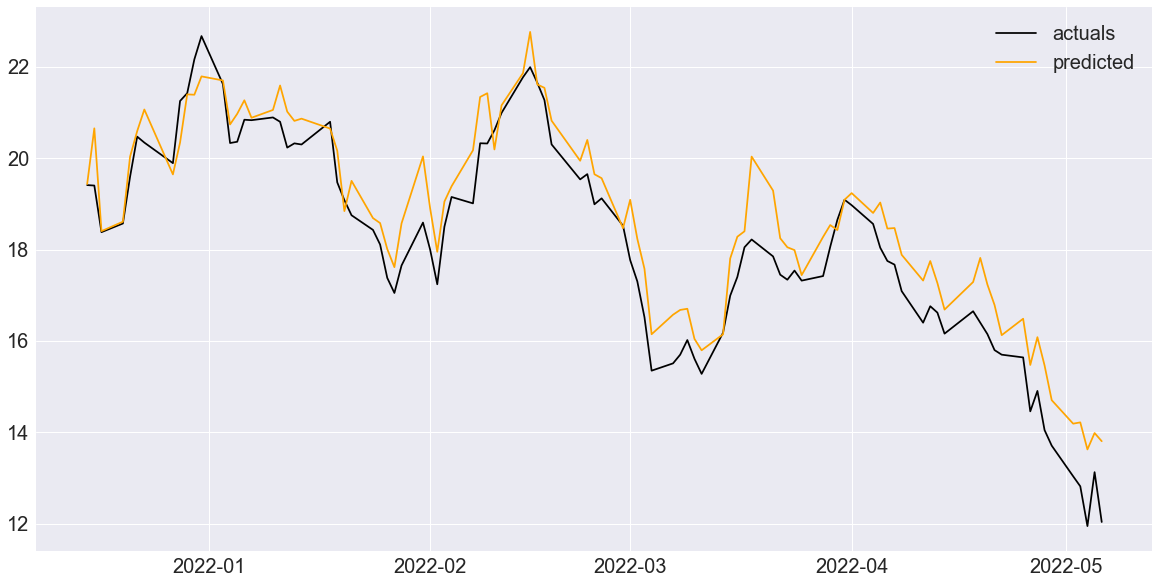

In [218]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test6['gtbif_next_close'], color='black')
ax.plot(y_test6['gtbif_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

In [219]:
hyper_table = pd.DataFrame(hyper_table)
hyper_table = hyper_table.sort_values('rmse', ascending=True)
hyper_table

version               model      rmse       mae  rows  train_rows  \
2    1+ETFs+Dow  LinearRegression()  0.390103  0.299655   982         883   
1        1+ETFs  LinearRegression()  0.393967  0.303087   982         883   
0         1+Dow  LinearRegression()  0.602533  0.480268   982         883   
5      All+ETFs  LinearRegression()  0.722942  0.598319   982         883   
6  All+ETFs+Dow  LinearRegression()  0.796811  0.673636   982         883   
3    All stocks  LinearRegression()  0.850810  0.735976   982         883   
4       All+Dow  LinearRegression()  0.950907  0.836618   982         883   

   test_rows  columns  
2         99      186  
1         99      160  
0         99       56  
5         99      394  
6         99      420  
3         99      264  
4         99      290

In [220]:
# hyper_table.to_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/data from notebooks/hyper_table.csv', index=False)